In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

import csv
from collections import defaultdict
import pandas as pd
import os
from matplotlib import colors as mcolors
import random



In [50]:

def read_df_file(df_file: str):
    
    group_to_data_list = defaultdict(list)
    with open(df_file) as f:
        #print(f.readline)
        name_list = f.readline().strip().split('\t')

        
        print(name_list)
        for line in f:
            value_list = line.strip().split('\t')
            #print(value_list)
            #input()
            for idx, value in enumerate(value_list):
                name = name_list[idx]
                
                if value and value.isdigit():
                    group_to_data_list[name].append(int(value))
    print(f'group: {name_list}')
    

    data_df = pd.DataFrame([(key, val) for key, vals in group_to_data_list.items() for val in vals], 
                  columns=['group', 'number'])
    
    return data_df, name_list


def read_tsv_file(file_path):
    data_dict = defaultdict(list)
    
    
    with open(file_path, 'r') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')

        # 读取抬头行，获取列名
        header = next(reader)
        num_columns = len(header)


        # 逐行读取数据并将其添加到对应的列列表中
        for row in reader:
            #print(row)
            #input()
            for i in range(num_columns):
                if str(row[i]).isdigit():
                    data_dict[header[i]].append(int(row[i]))
    
    data_df = pd.DataFrame([(key, val) for key, vals in data_dict.items() for val in vals], 
              columns=['group', 'number'])
    return data_df, header
            

In [51]:
base_path = '/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_data_dir'

fig_save_path = f'/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_save_dir'


In [52]:

def generate_random_color(categories: list):
    # 从matplotlib的颜色库中获取所有颜色名称
    all_colors = list(mcolors.CSS4_COLORS.keys())
    
    # 随机选择不重复的颜色
    random_colors = random.sample(all_colors, len(categories))
    
    # 生成颜色字典
    color_dict = {category: mcolors.CSS4_COLORS[color] for category, color in zip(categories, random_colors)}
    return color_dict


def file_to_plot(plot_file: str, save_path: str):
    print(f'processing {plot_file}')
    plot_df, name_list = read_df_file(test_file)
    prefix = '.'.join(os.path.basename(test_file).split('.')[:-1])
    save_file = f'{save_path}/{prefix}.eps'

    colors_1 = generate_random_color(name_list)
    colors_2 = generate_random_color(name_list)
    
    ax = sns.violinplot(x='number', y='group', data=plot_df,
                    palette=colors_1,
                    cut=0, inner=None)

    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                           transform=ax.transData))
        
    num_items = len(ax.collections)
    sns.stripplot(x='number', y='group', data=plot_df,
                  palette=colors_2,
                  alpha=0.6, size=7)

    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + 0.15)
        
    sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
                showfliers=False, 
                #showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='darkorange',
                               markersize=10, zorder=3),
                boxprops=dict(facecolor=(0,0,0,0), 
                              linewidth=3, zorder=3),
                whiskerprops=dict(linewidth=3),
                capprops=dict(linewidth=3),
                medianprops=dict(linewidth=3))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the remaining spines (bottom and left).
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
    #plt.savefig(save_file, dpi=630, bbox_inches='tight')
    print(f'{save_file} saved.')

processing /mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_data_dir/China-host ARGs.txt
['Homo', 'Non-Homo', 'Chicken', 'Swine', 'Cow', 'Dog', 'Cat', 'Blowfly']
group: ['Homo', 'Non-Homo', 'Chicken', 'Swine', 'Cow', 'Dog', 'Cat', 'Blowfly']
/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_save_dir/China-host ARGs.eps saved.


/tmp/ipykernel_249463/854893185.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='number', y='group', data=plot_df,
/tmp/ipykernel_249463/854893185.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='number', y='group', data=plot_df,


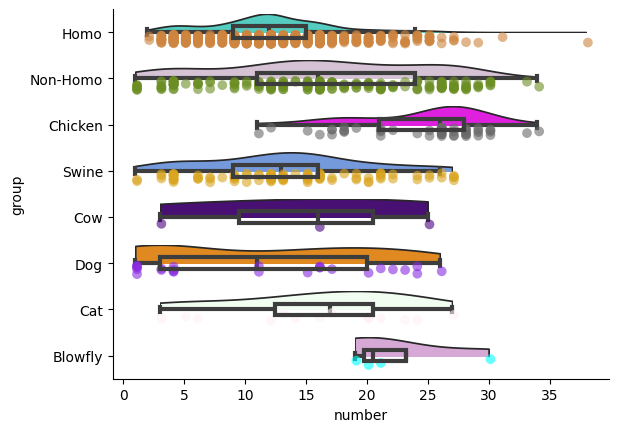

In [53]:
test_file = f'{base_path}/China-host ARGs.txt'
file_to_plot(test_file, fig_save_path)

['Homo', 'Non-Homo', 'Chicken', 'Swine', 'Cow', 'Dog', 'Cat', 'Blowfly']
group: ['Homo', 'Non-Homo', 'Chicken', 'Swine', 'Cow', 'Dog', 'Cat', 'Blowfly']


/tmp/ipykernel_249463/1321613569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='number', y='group', data=plot_df,
/tmp/ipykernel_249463/1321613569.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='number', y='group', data=plot_df,


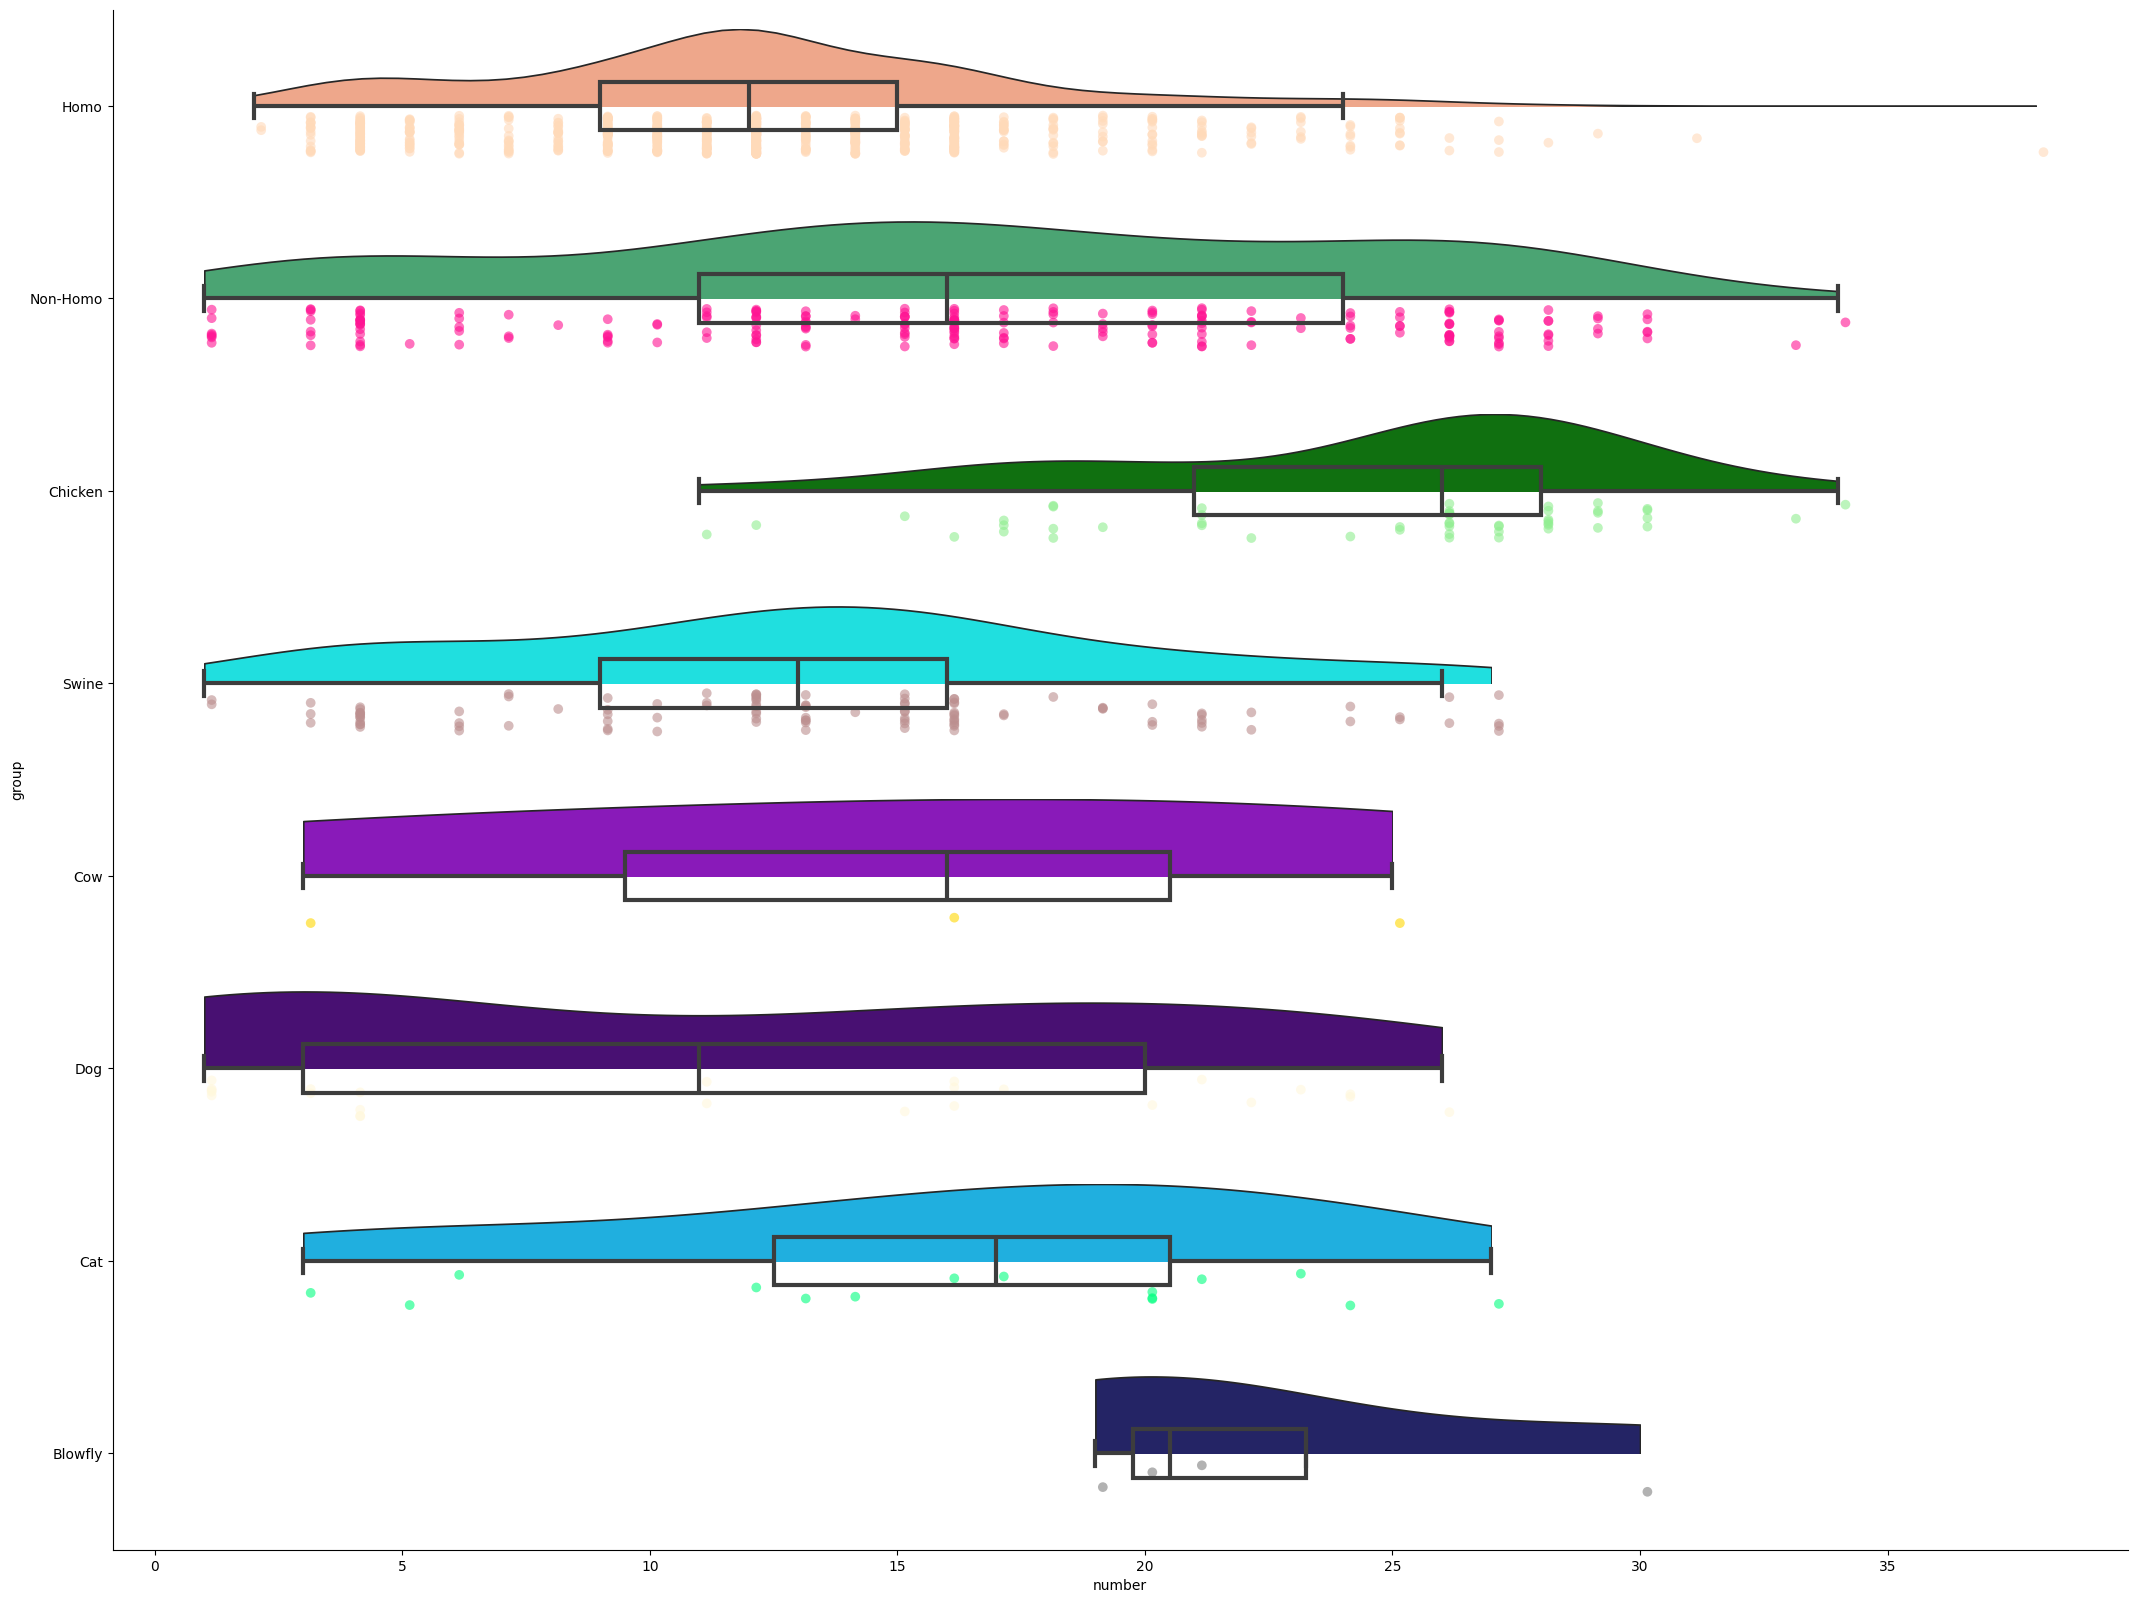

In [54]:

test_file = f'{base_path}/China-host ARGs.txt'

plot_df, name_list = read_df_file(test_file)


plt.figure(figsize=(26, 20))

colors_1 = generate_random_color(name_list)
colors_2 = generate_random_color(name_list)

ax = sns.violinplot(x='number', y='group', data=plot_df,
                    palette=colors_1,
                    cut=0, inner=None)

for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax.transData))


num_items = len(ax.collections)
sns.stripplot(x='number', y='group', data=plot_df,
              palette=colors_2,
              alpha=0.6, size=7)

for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)

sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
            showfliers=False, 
            #showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the remaining spines (bottom and left).
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


#plt.savefig(save_file, dpi=630, bbox_inches='tight')
#print(f'{save_file} saved.')

processing 0/19: China-mlst-plasmid.txt
['11', '258', '15', '16', '147', '14', '37', '307', '23', '101', '17', '35', '45', '3128', '29', '268']
group: ['11', '258', '15', '16', '147', '14', '37', '307', '23', '101', '17', '35', '45', '3128', '29', '268']
/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_save_dir/China-mlst-plasmid.eps saved.
processing 1/19: country-ARGs.txt
['China', 'Europ', 'Usa', 'Others']
group: ['China', 'Europ', 'Usa', 'Others']
/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_save_dir/country-ARGs.eps saved.
processing 2/19: usa-mlst-ARGs.txt
['11', '258', '15', '16', '147', '14', '37', '307', '23', '17', '35', '45', '231', '43', '29', '268']
group: ['11', '258', '15', '16', '147', '14', '37', '307', '23', '17', '35', '45', '231', '43', '29', '268']
/mnt/disk1/xzyao/Bacteria/小胖临时数据_240618/plot_save_dir/usa-mlst-ARGs.eps saved.
processing 3/19: europ-mlst-plasmid.txt
['11', '258', '15', '16', '147', '14', '37', '307', '23', '17', '35', '45', '231', '43', '29', '268']
gro

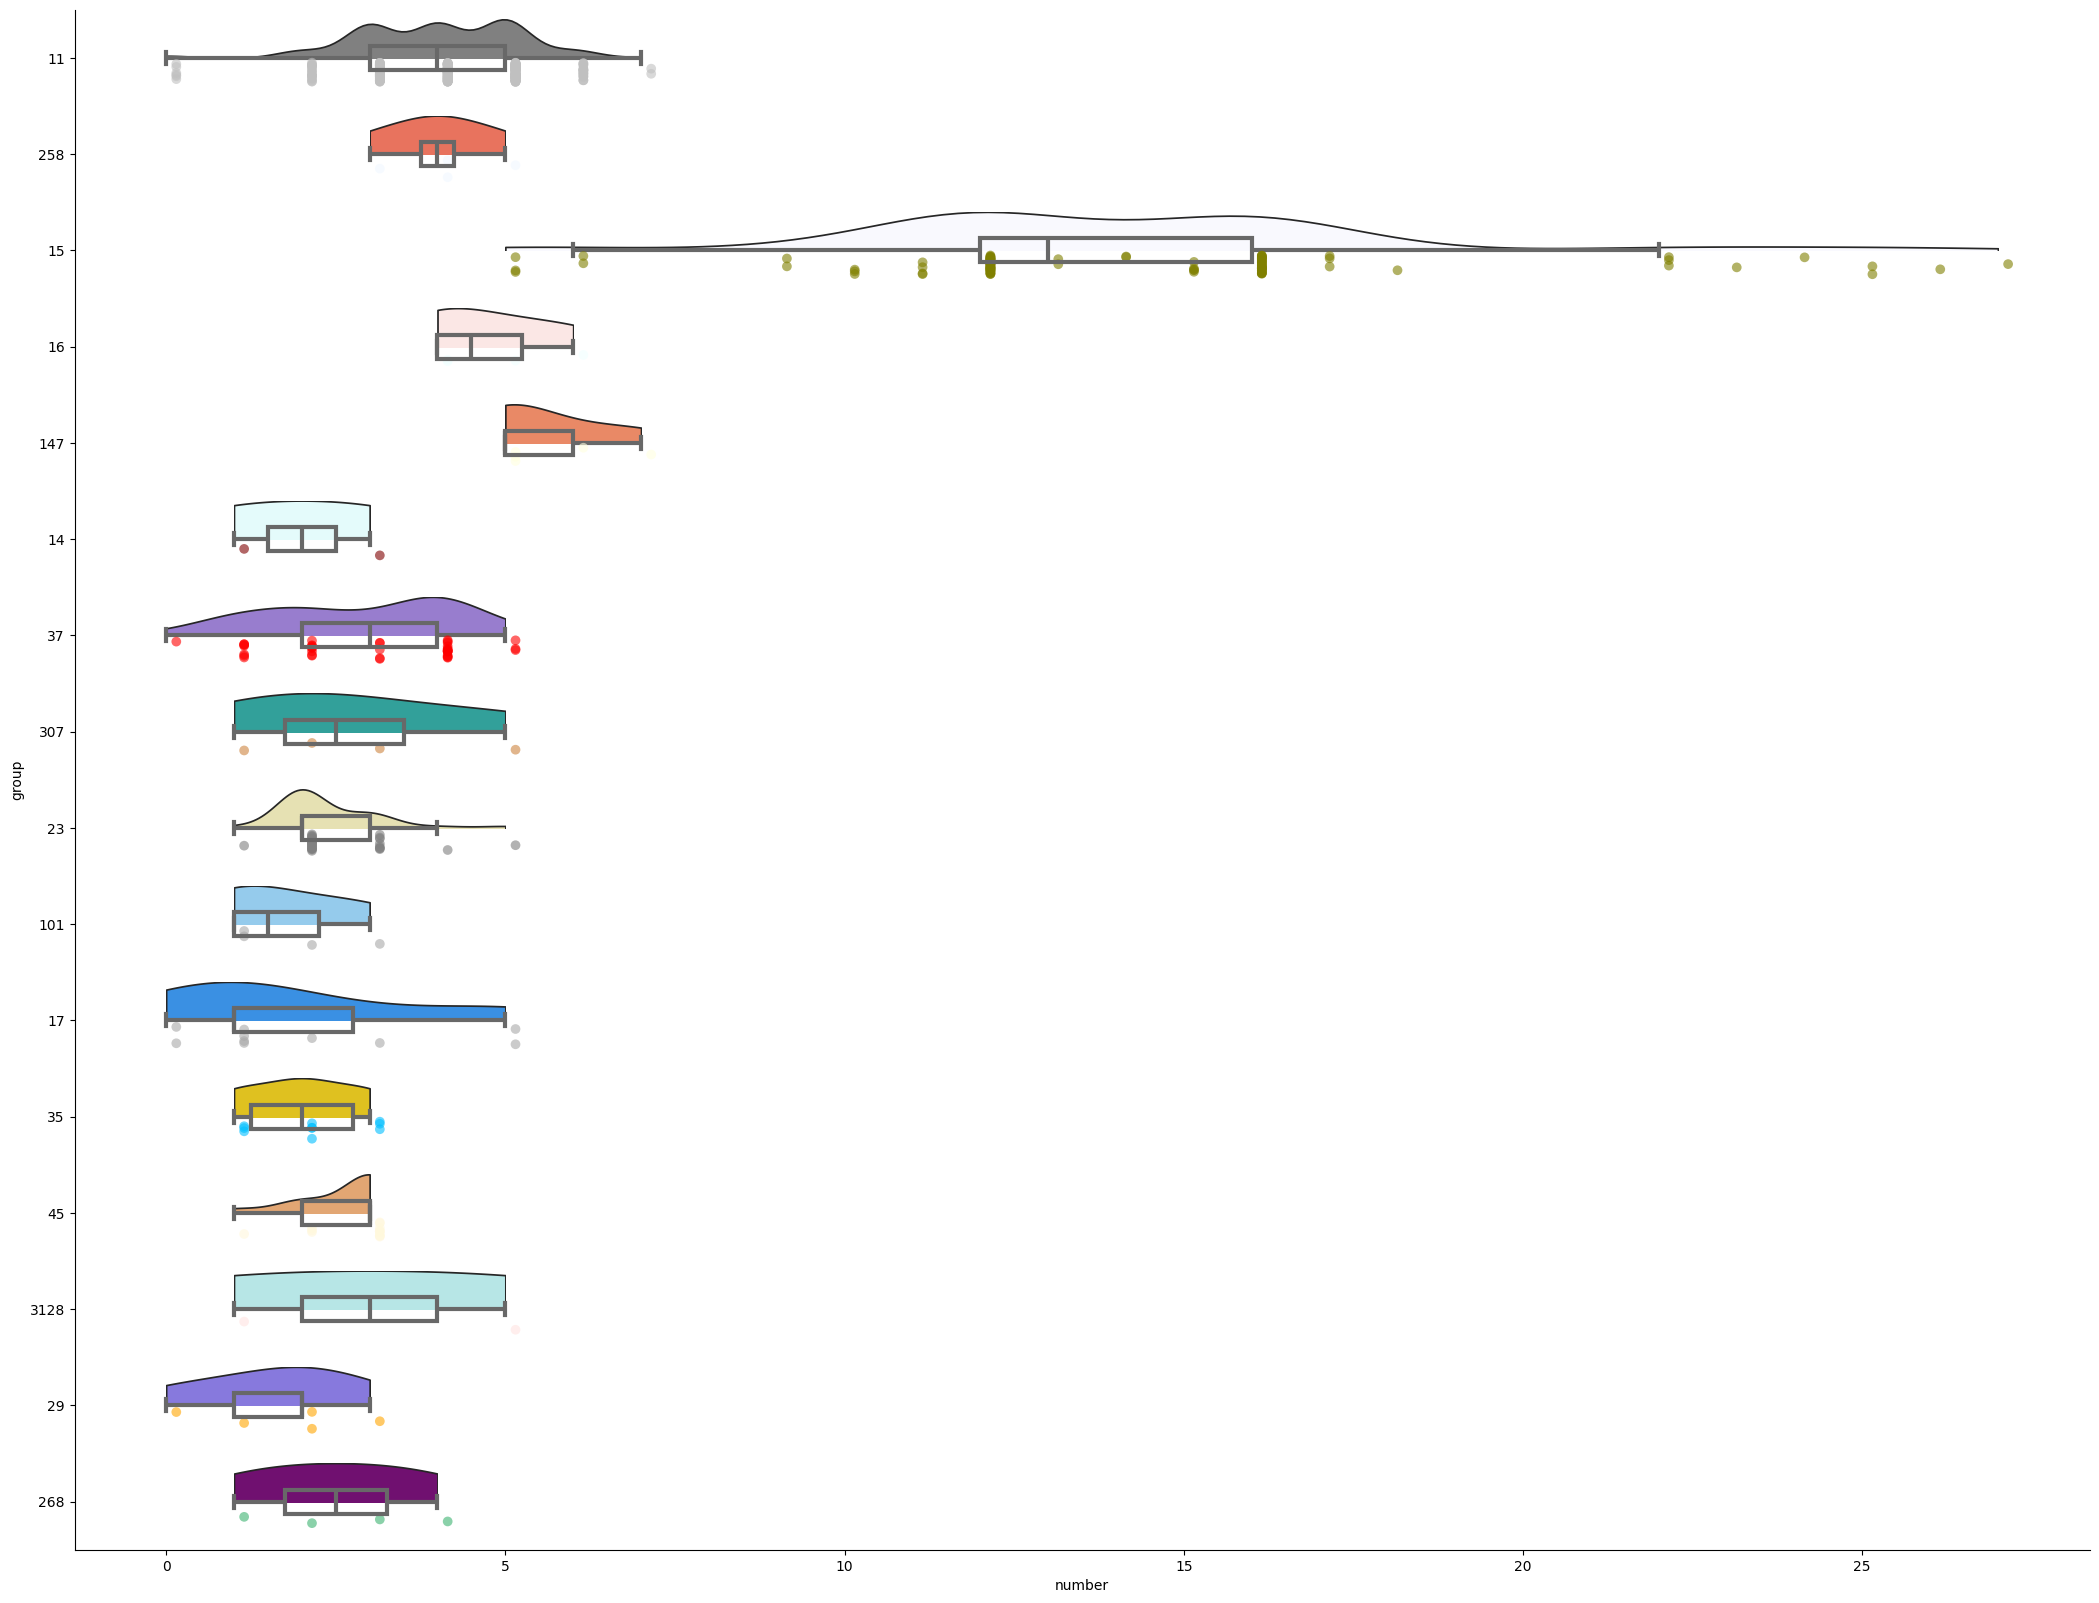

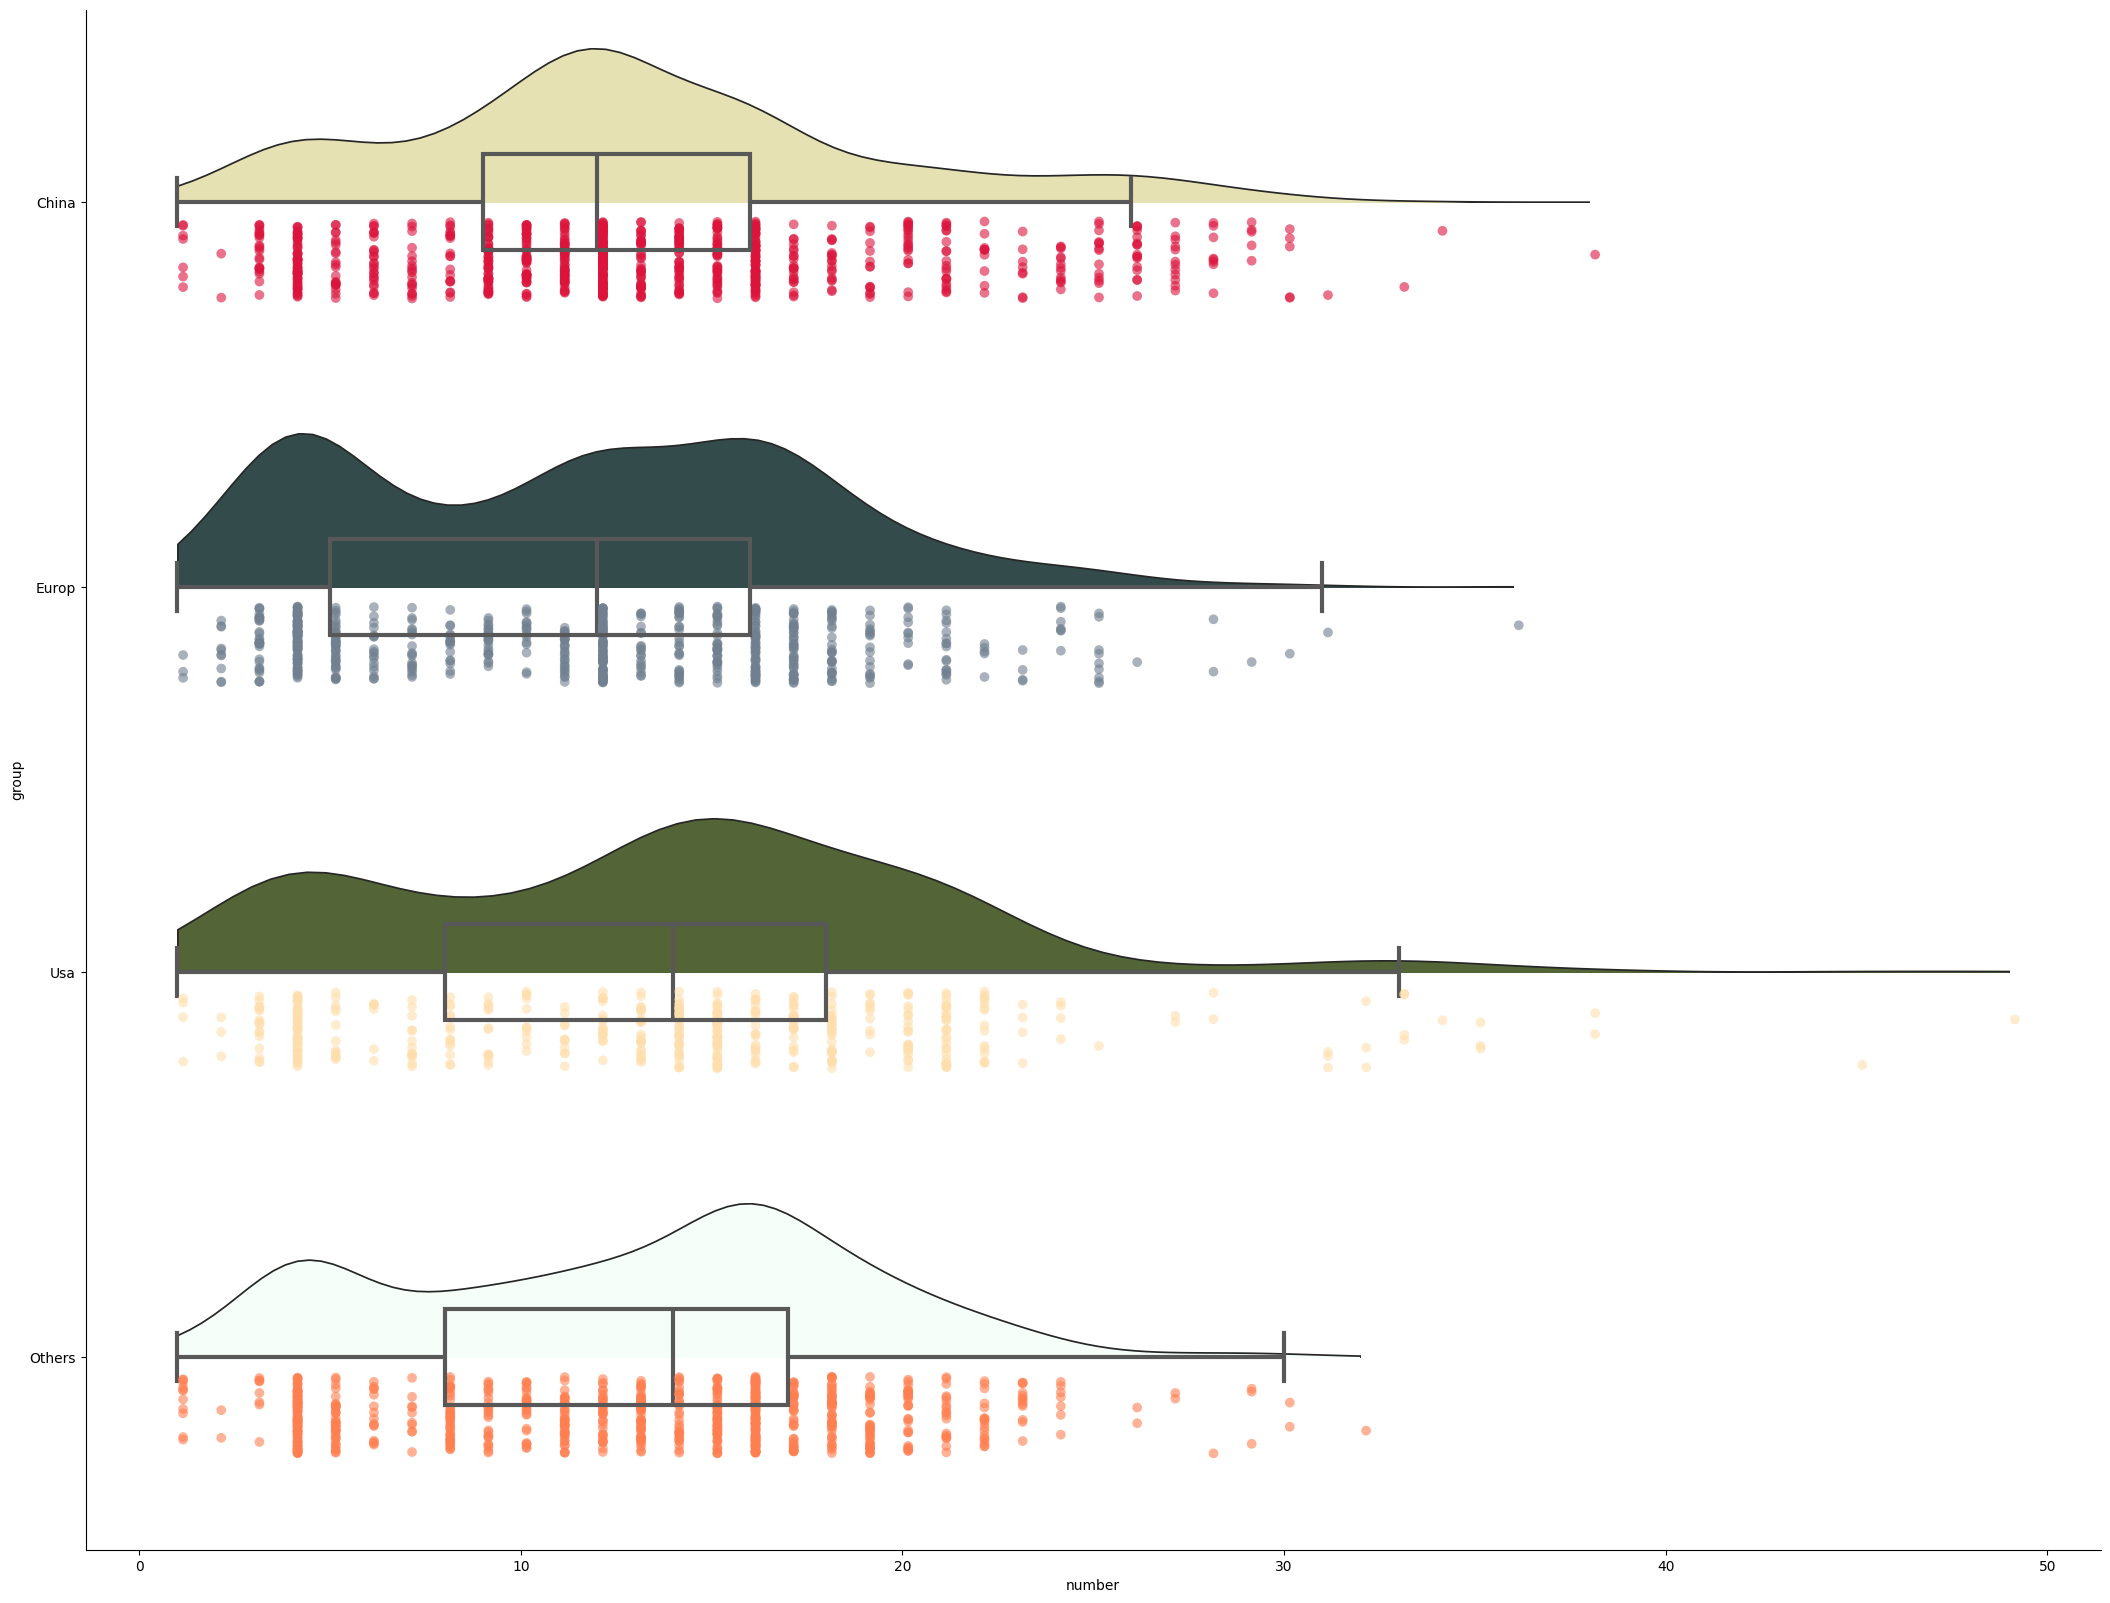

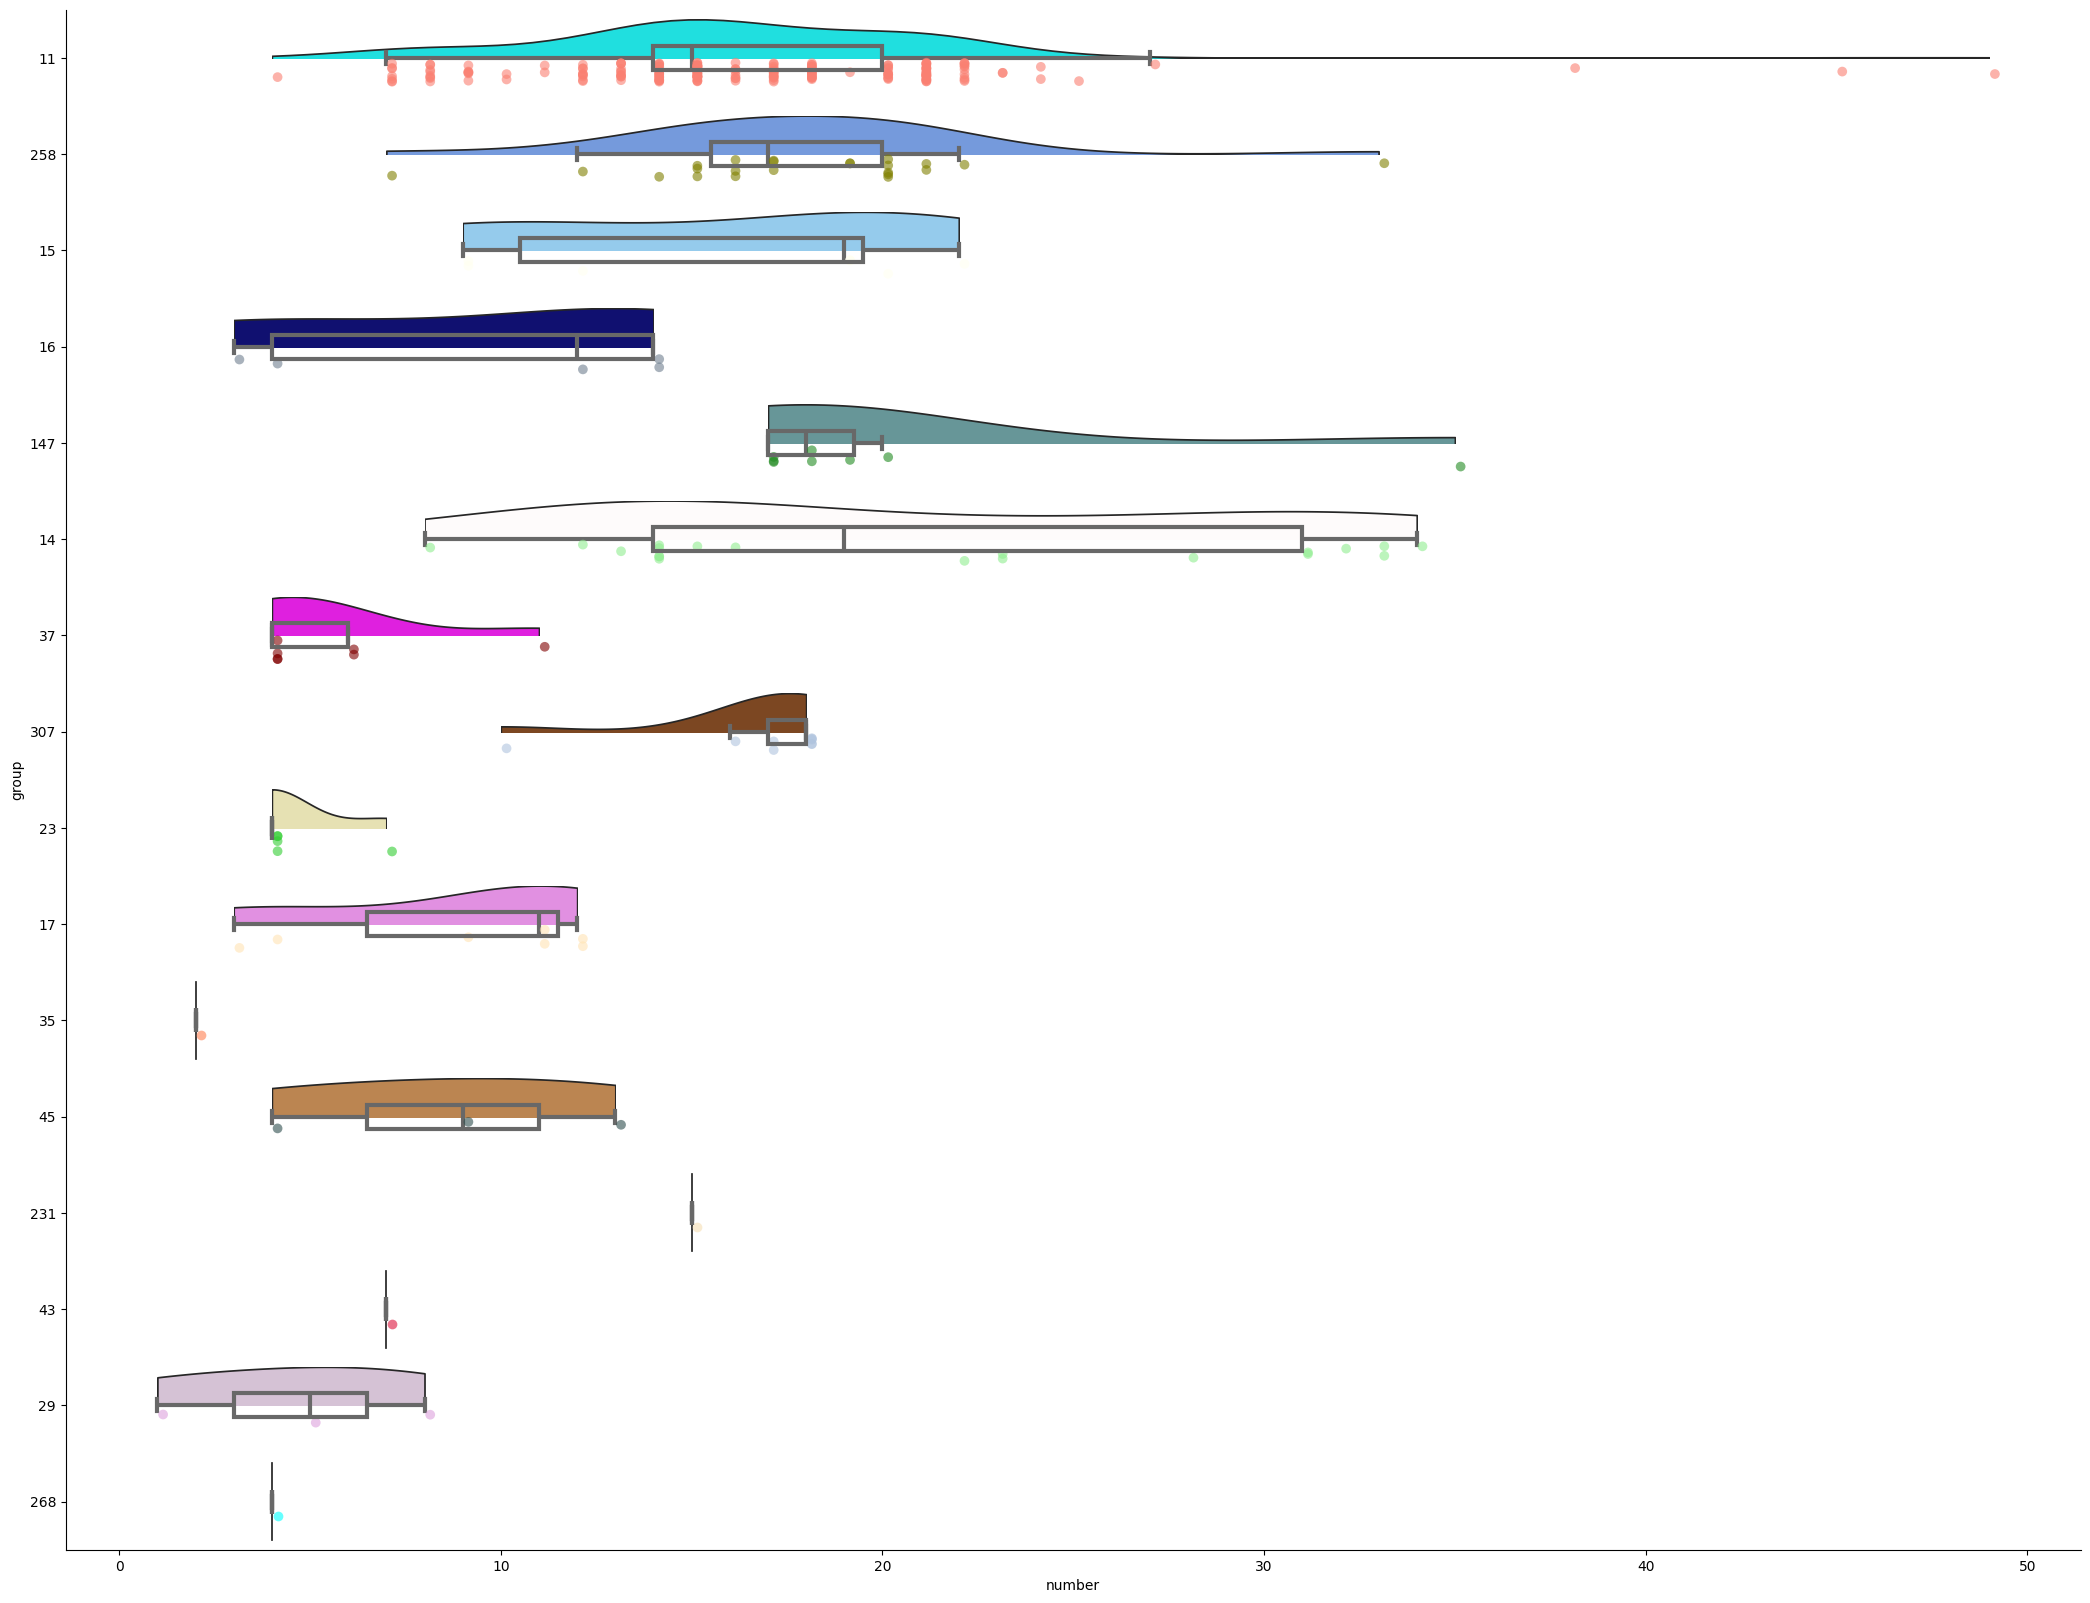

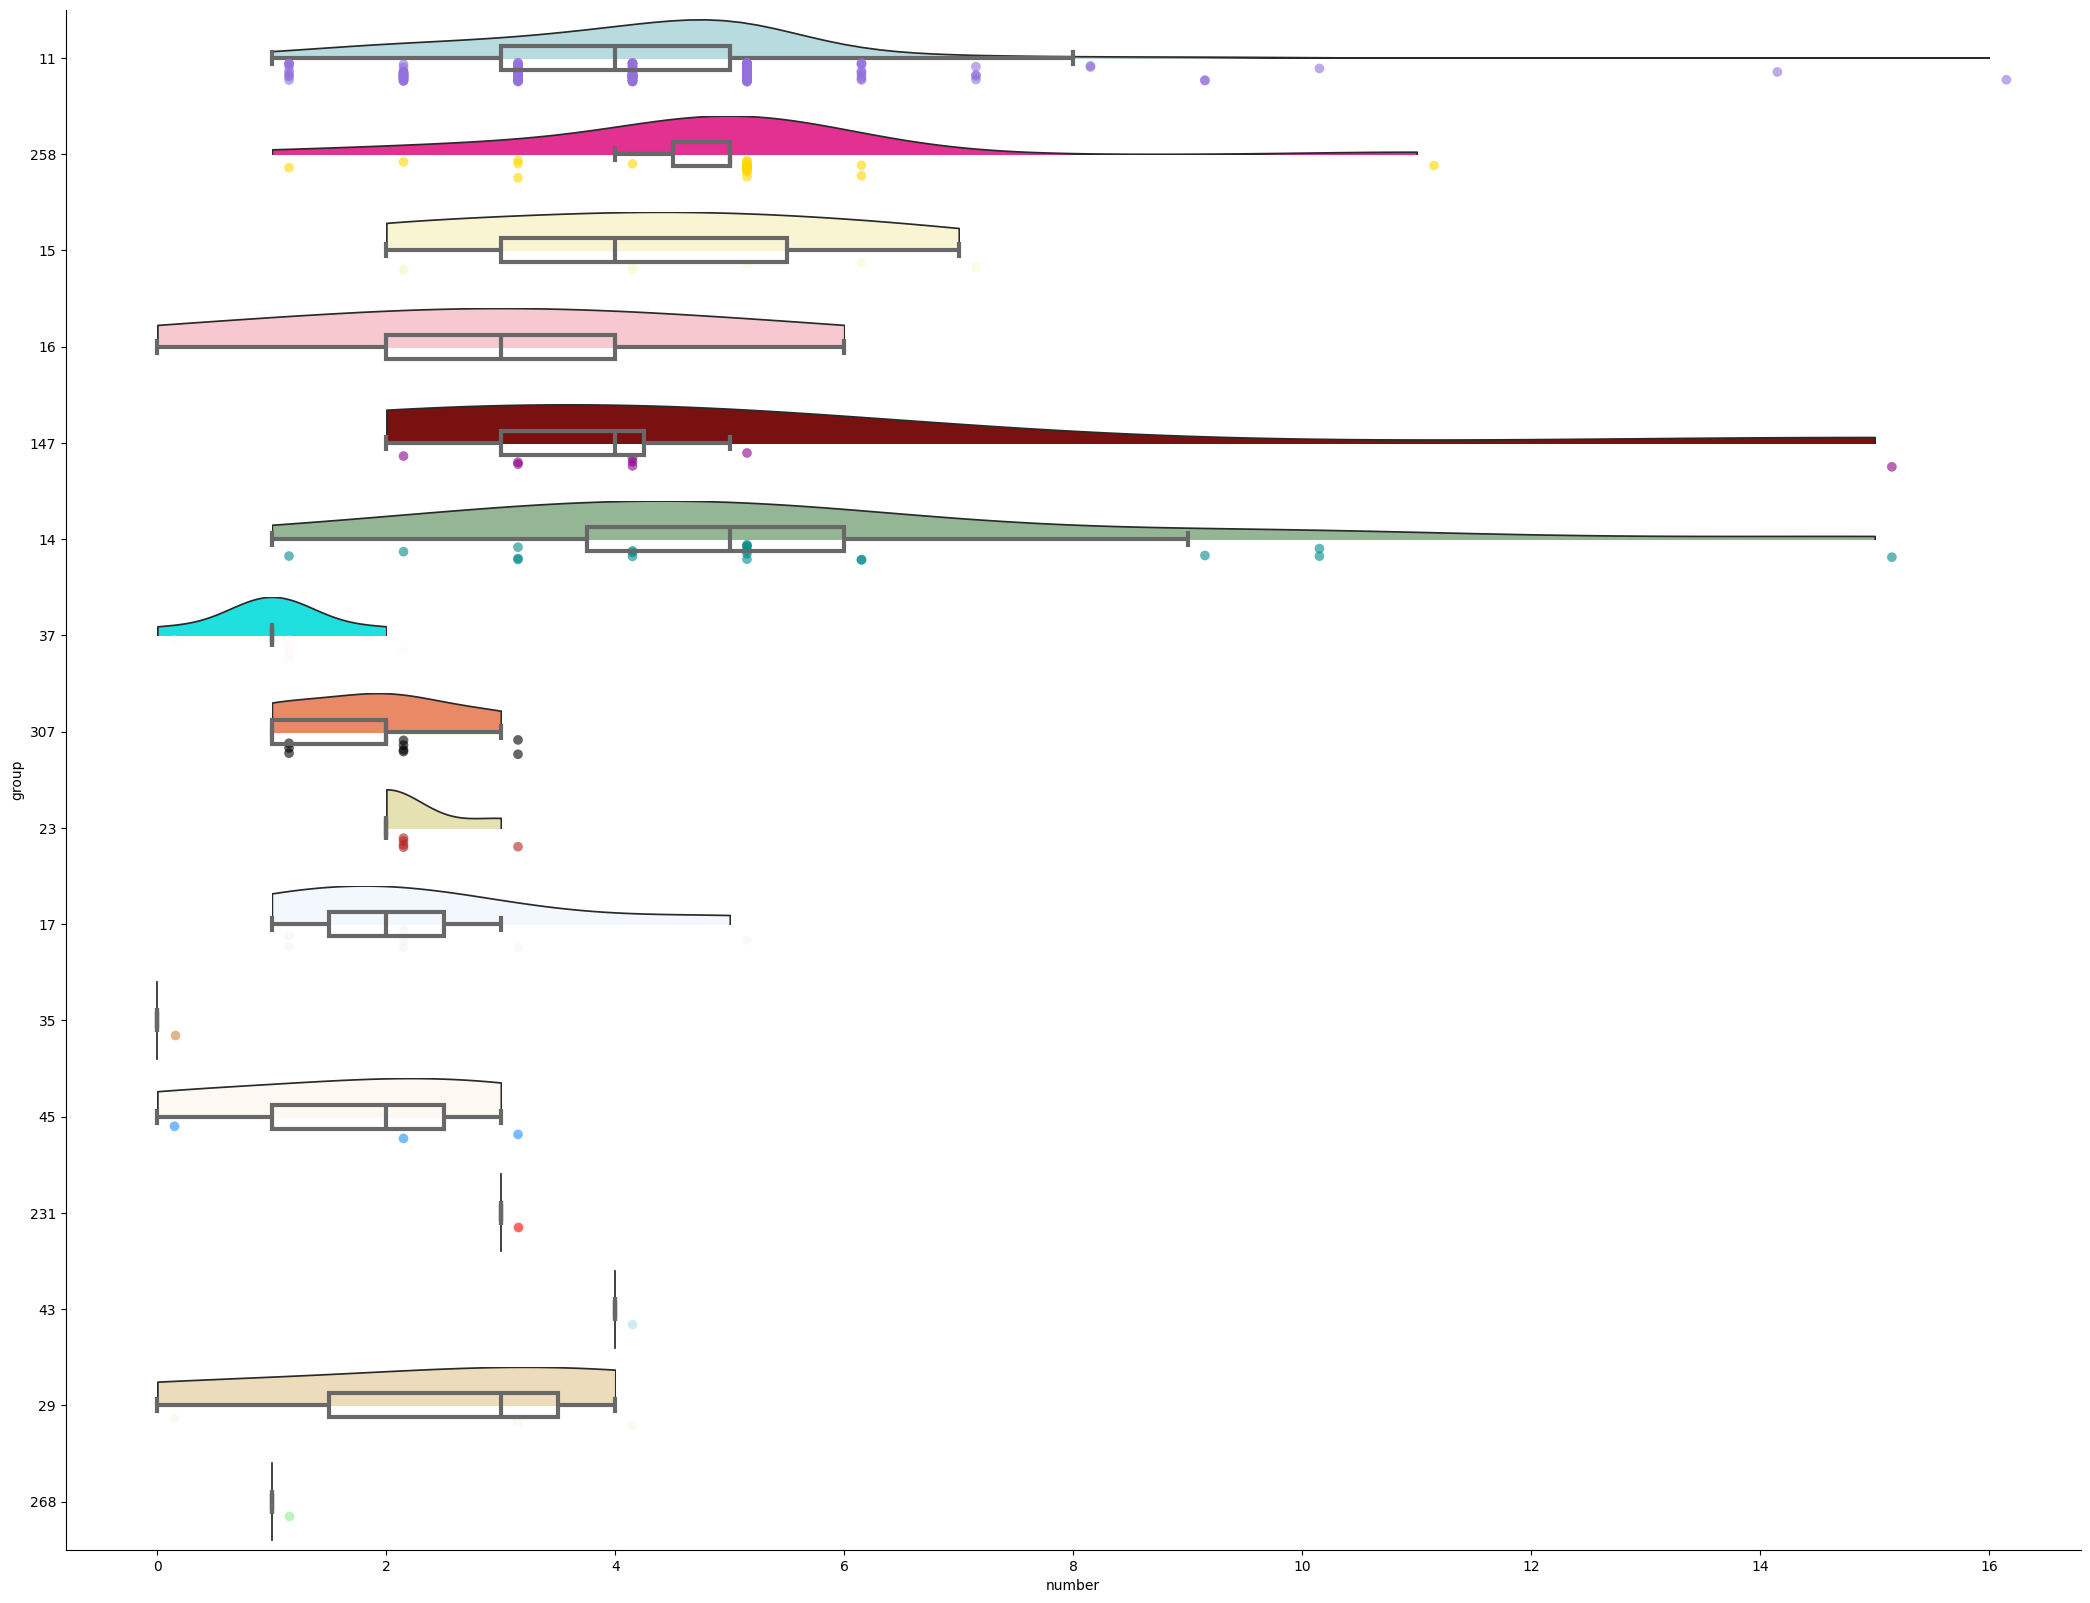

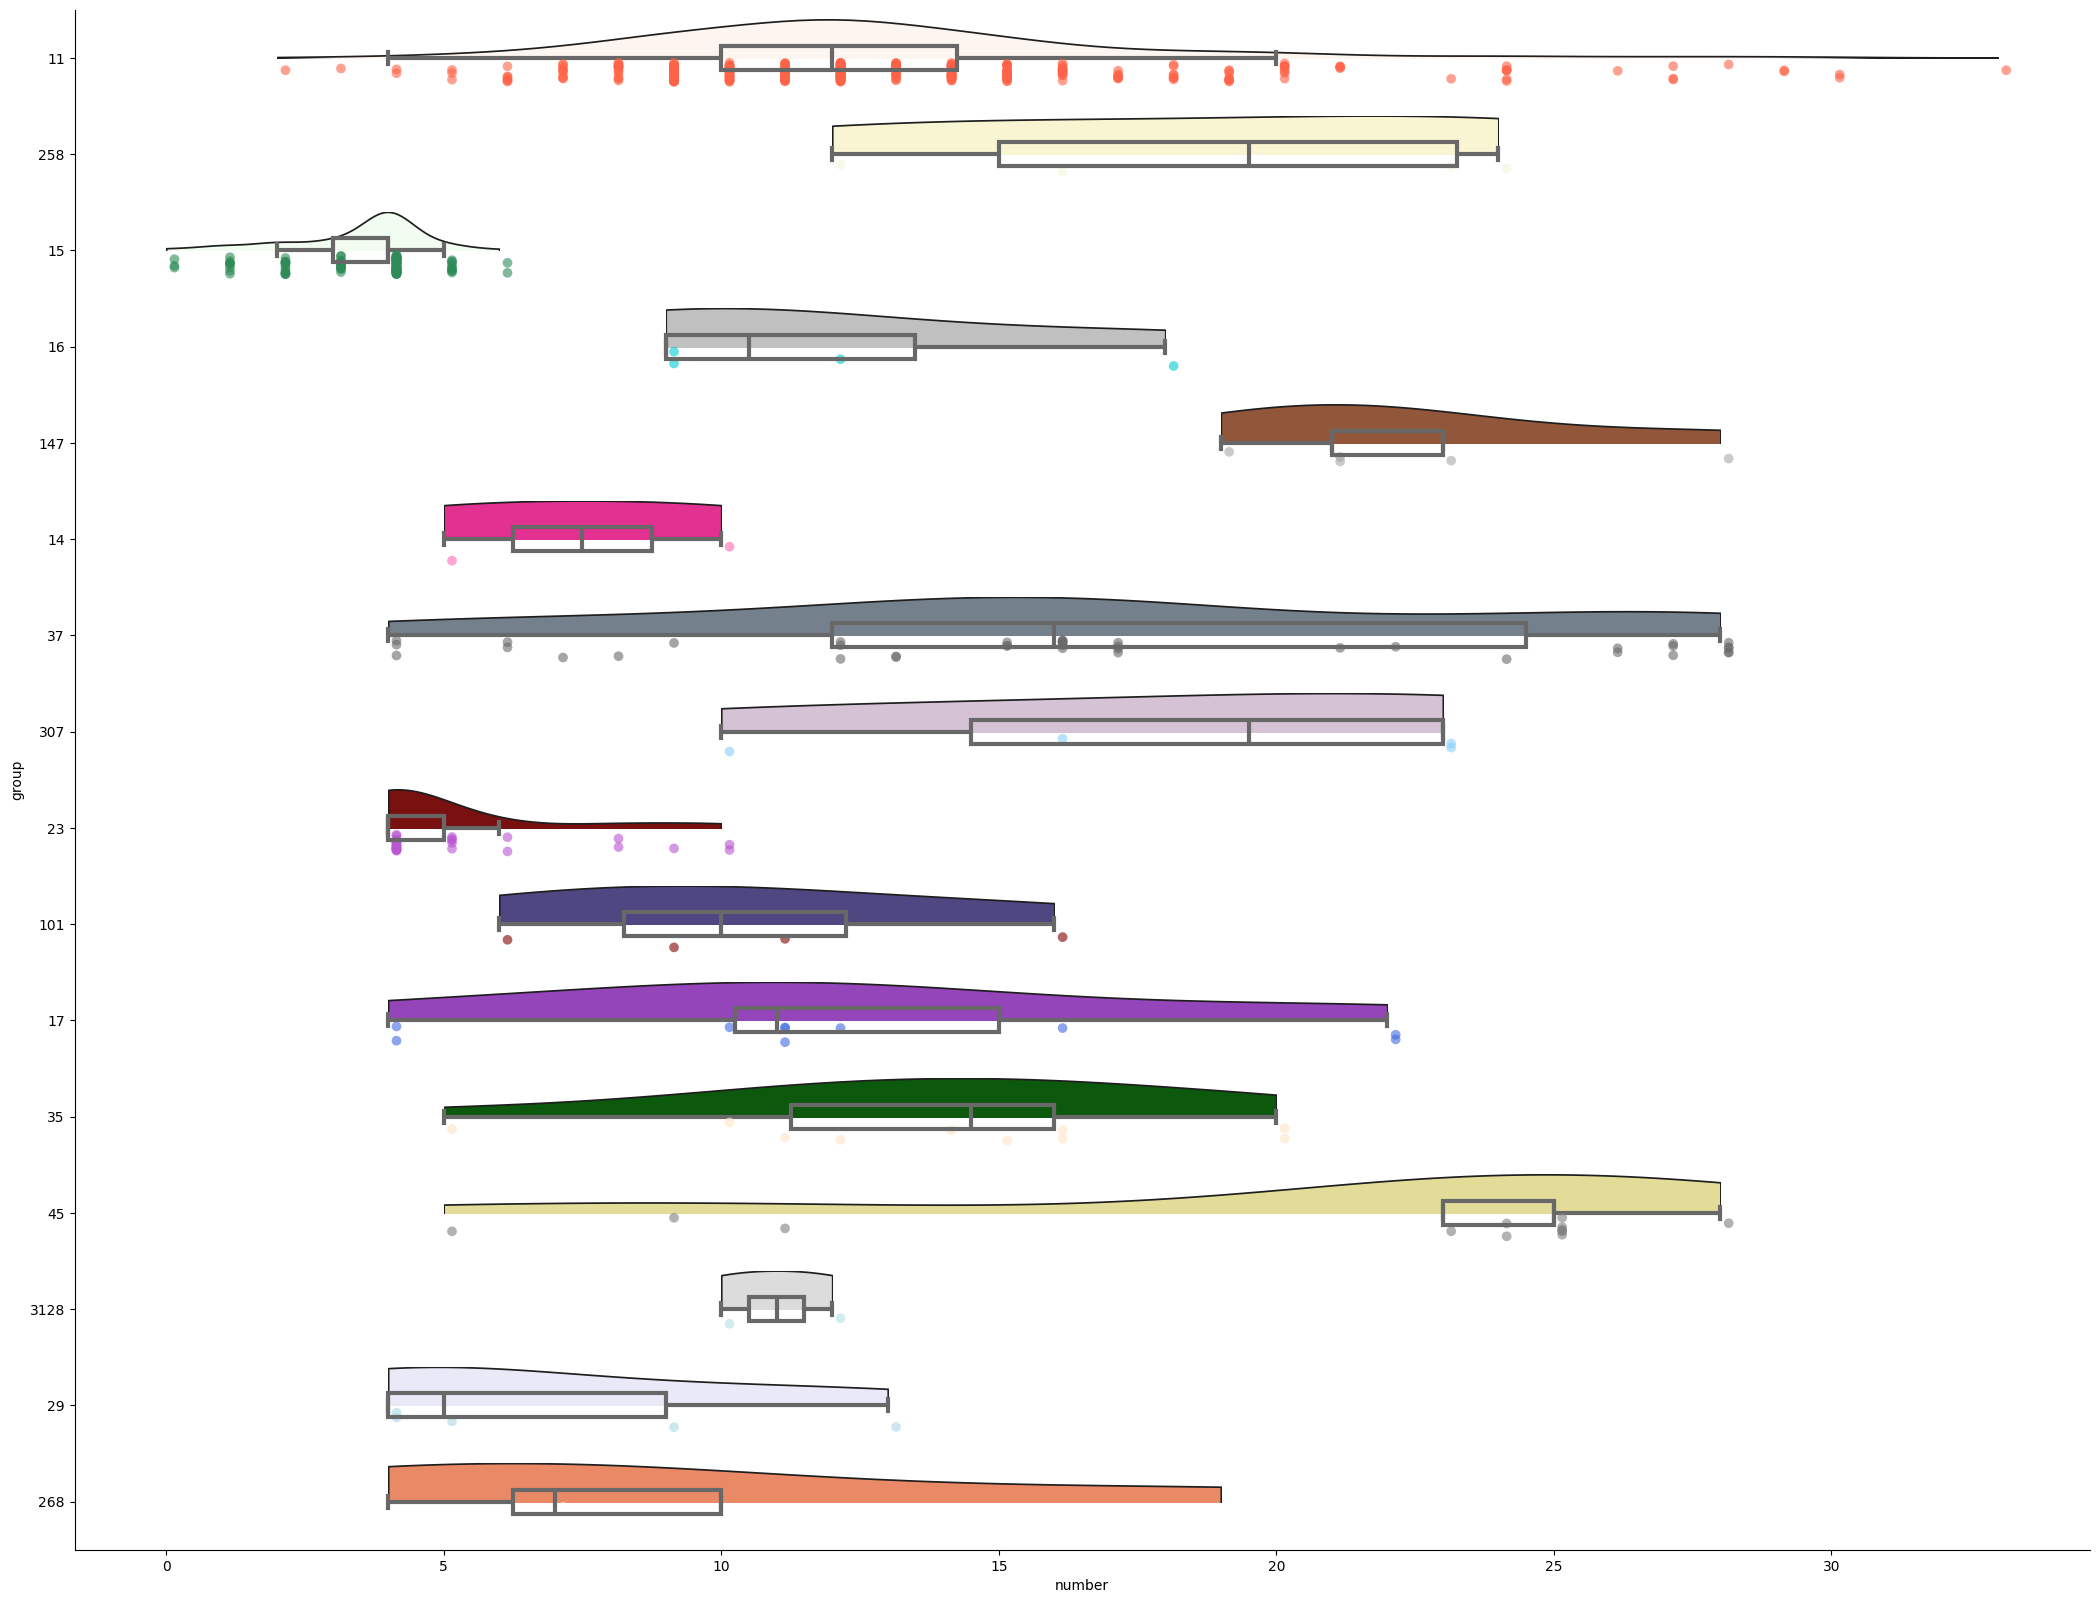

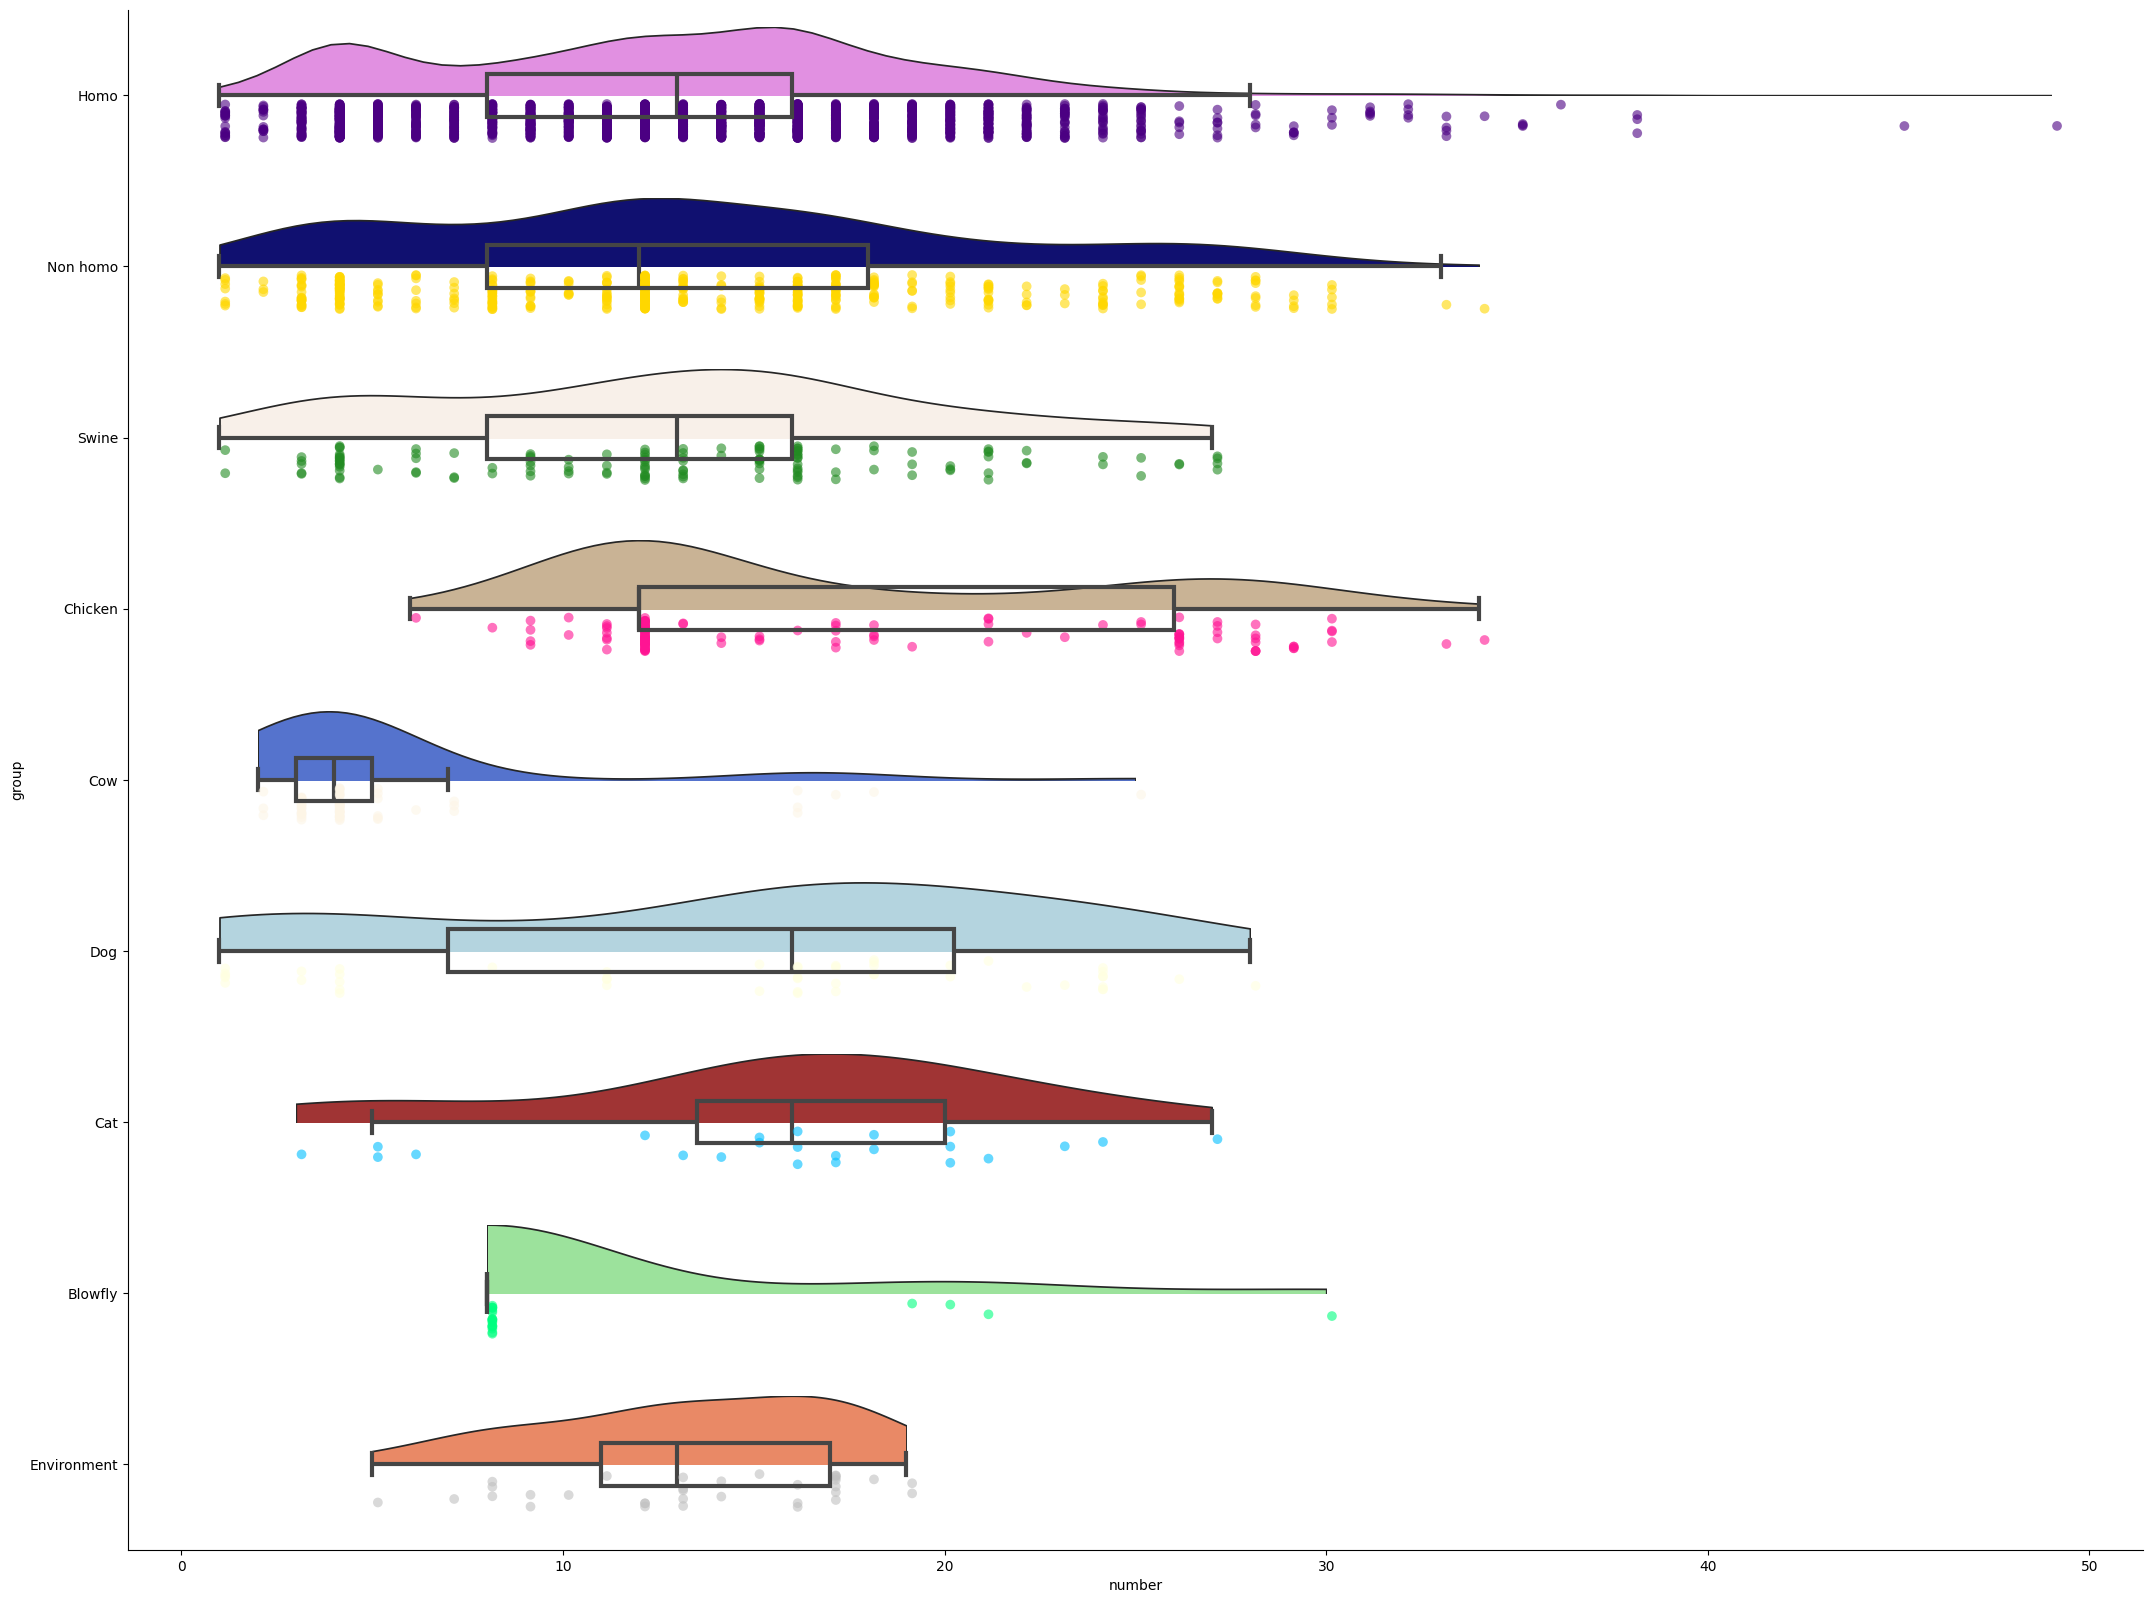

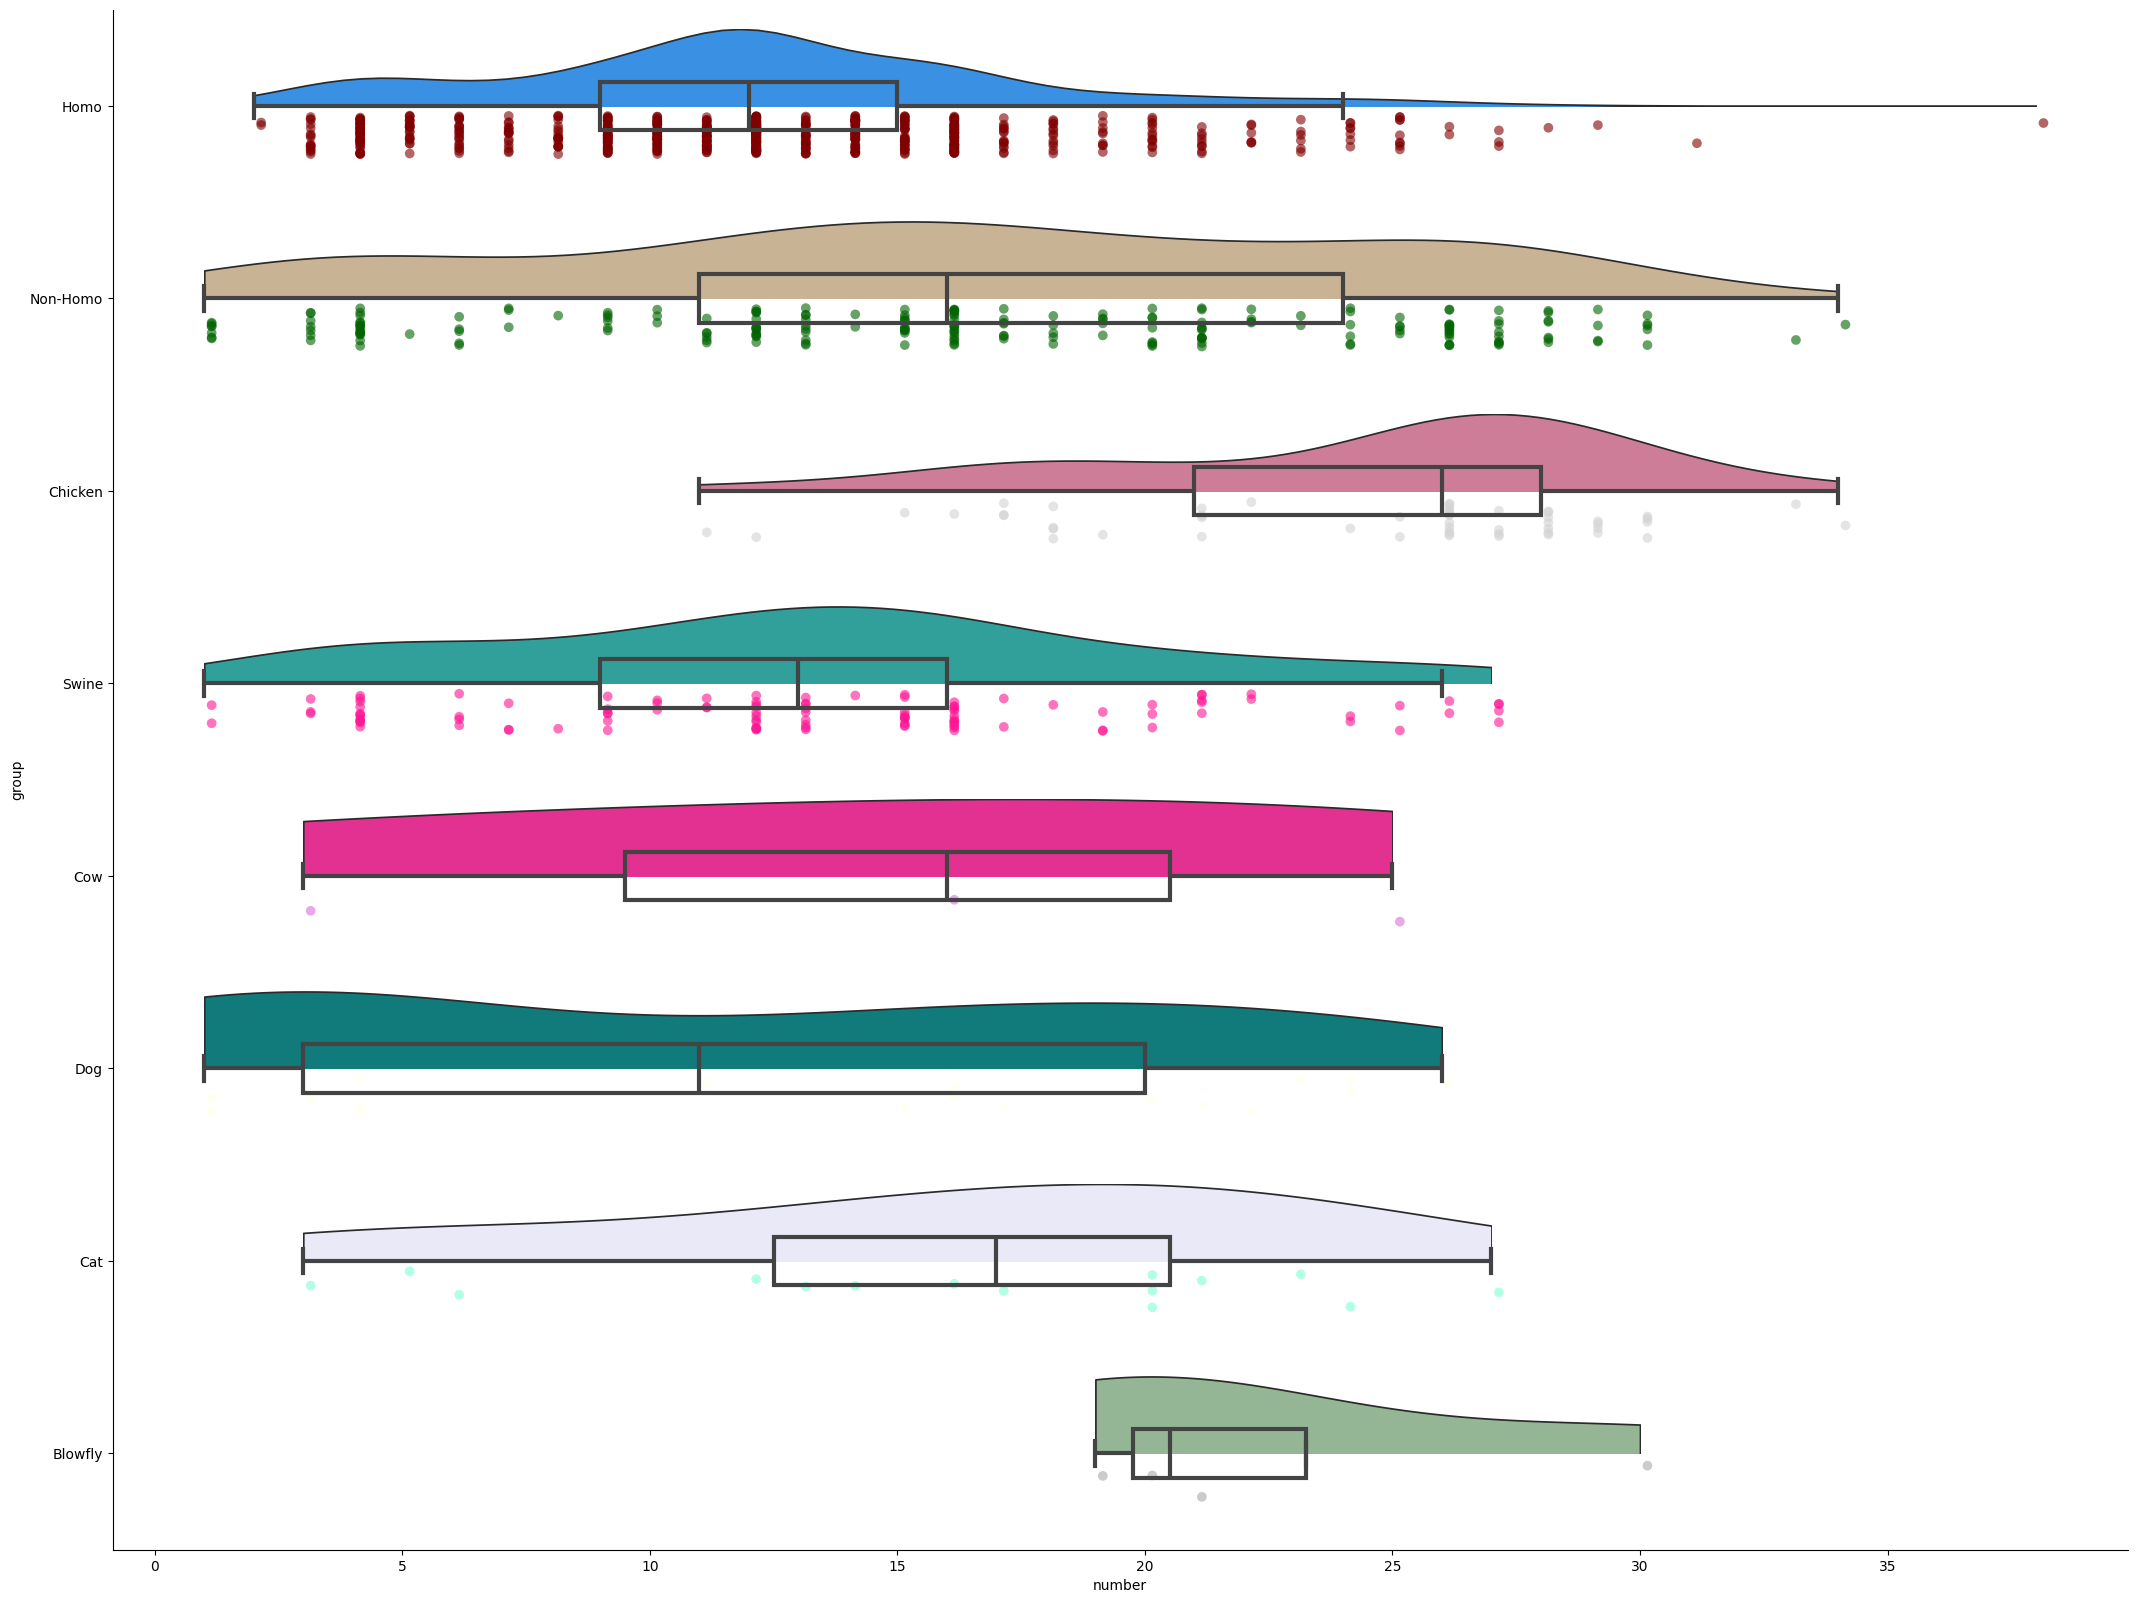

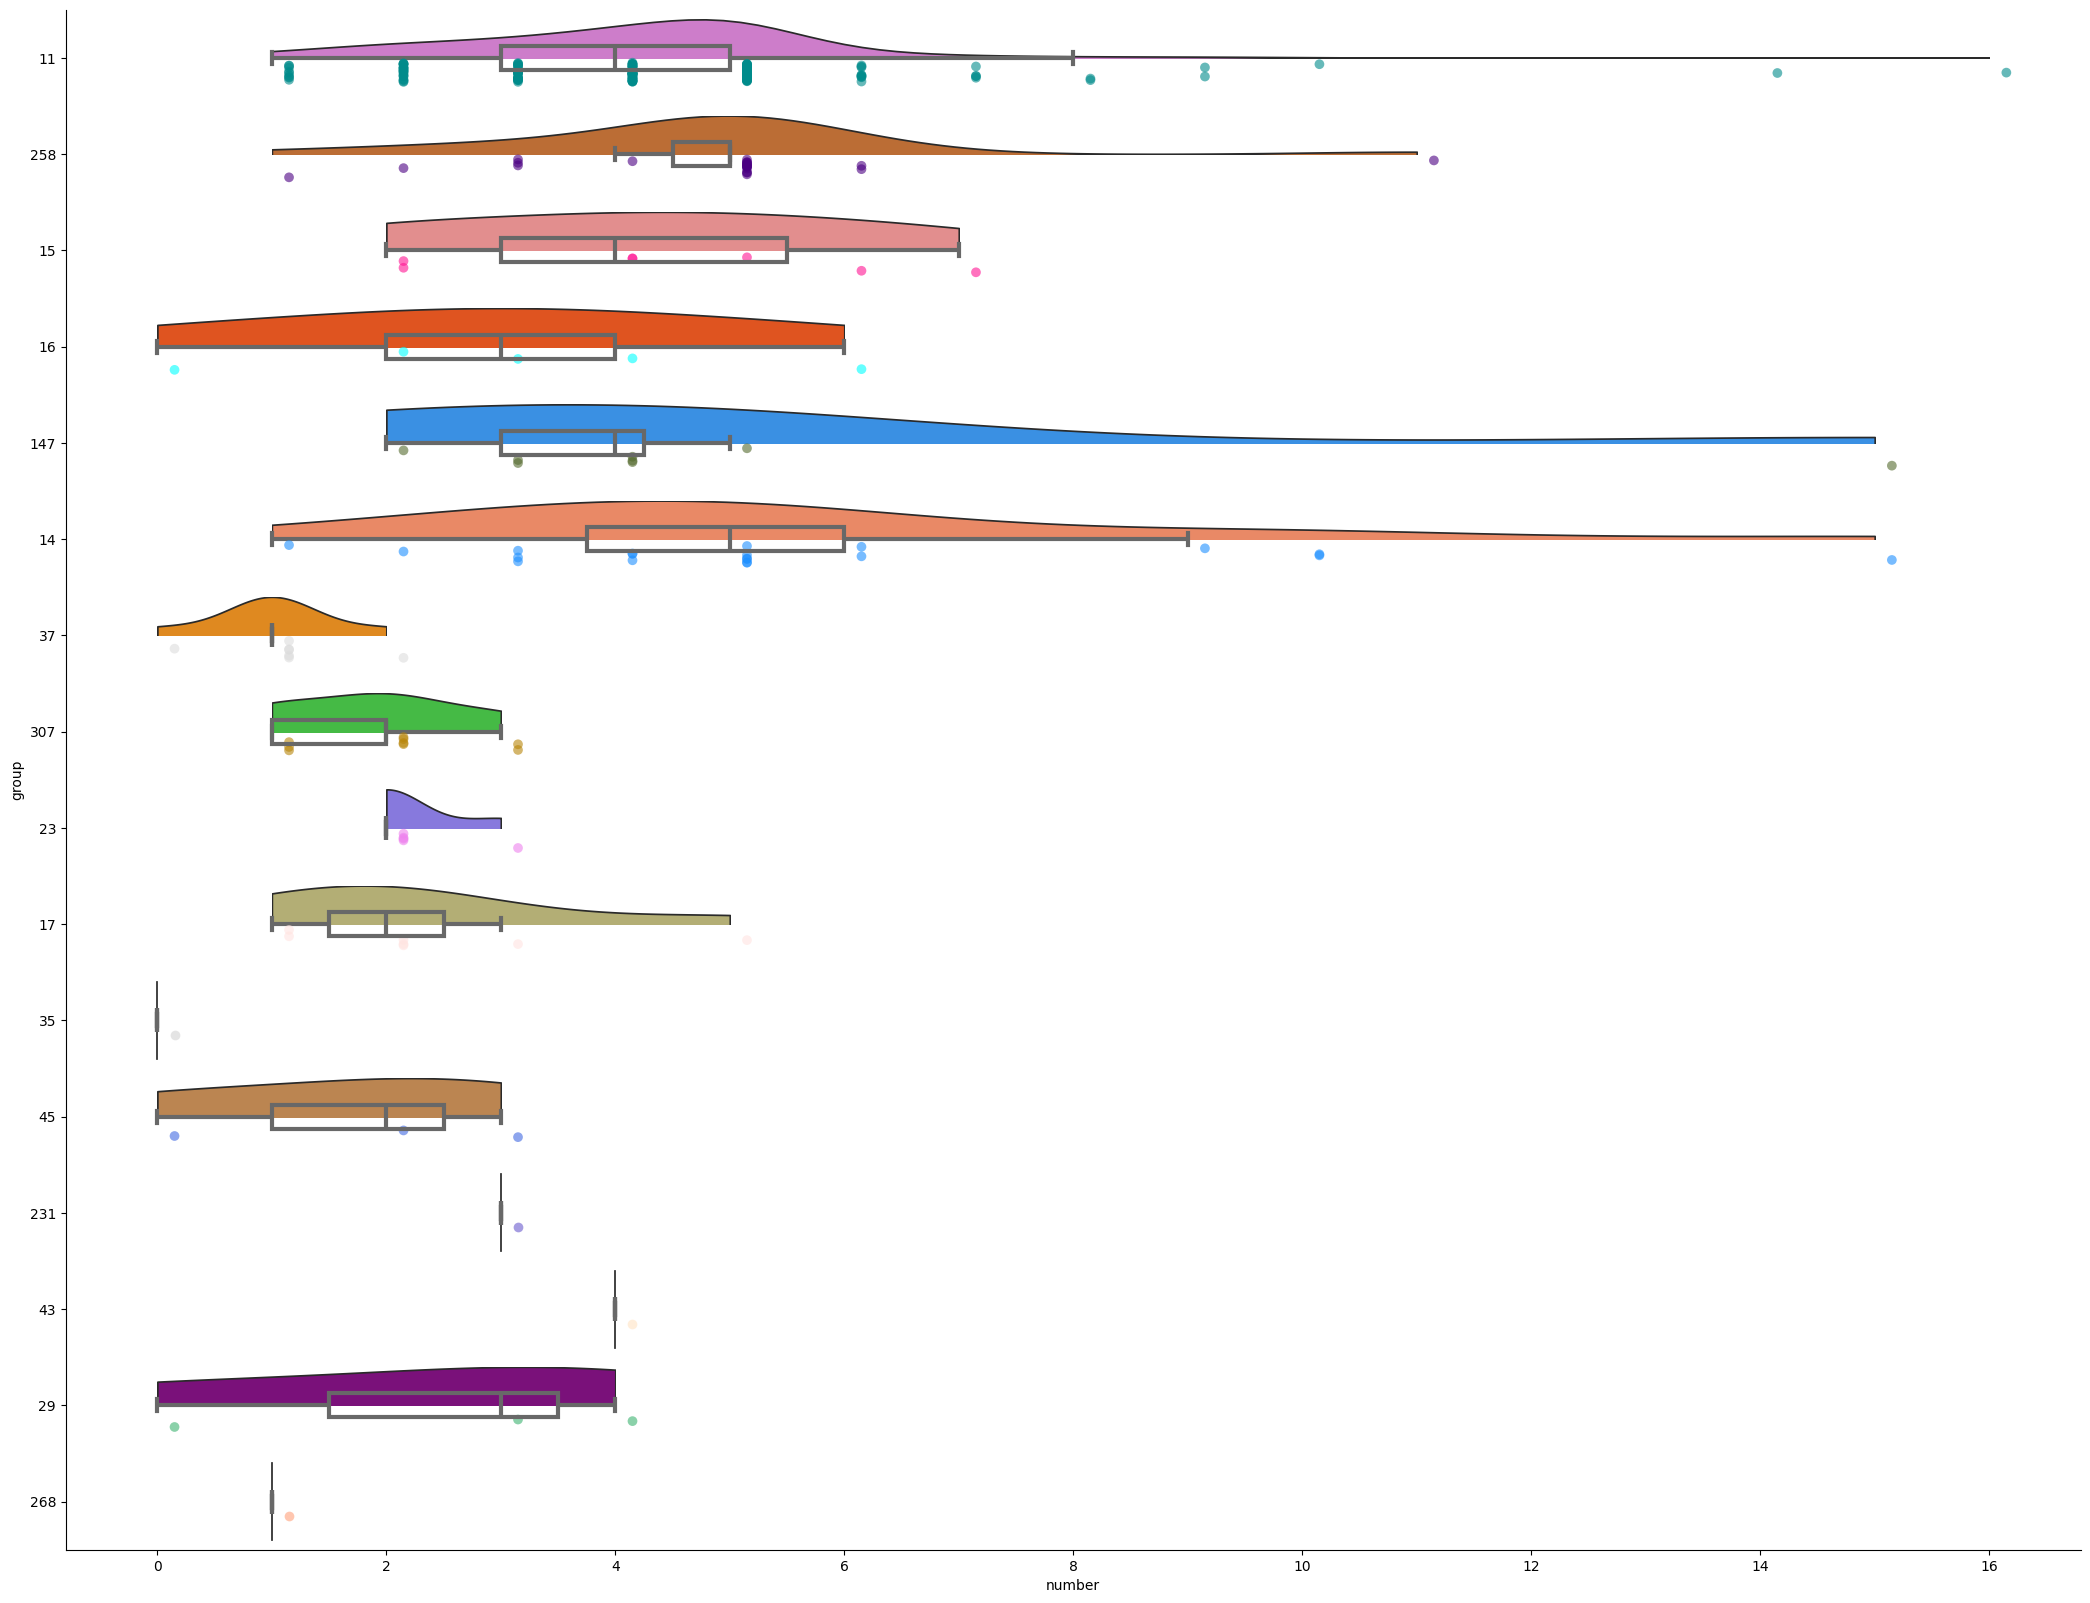

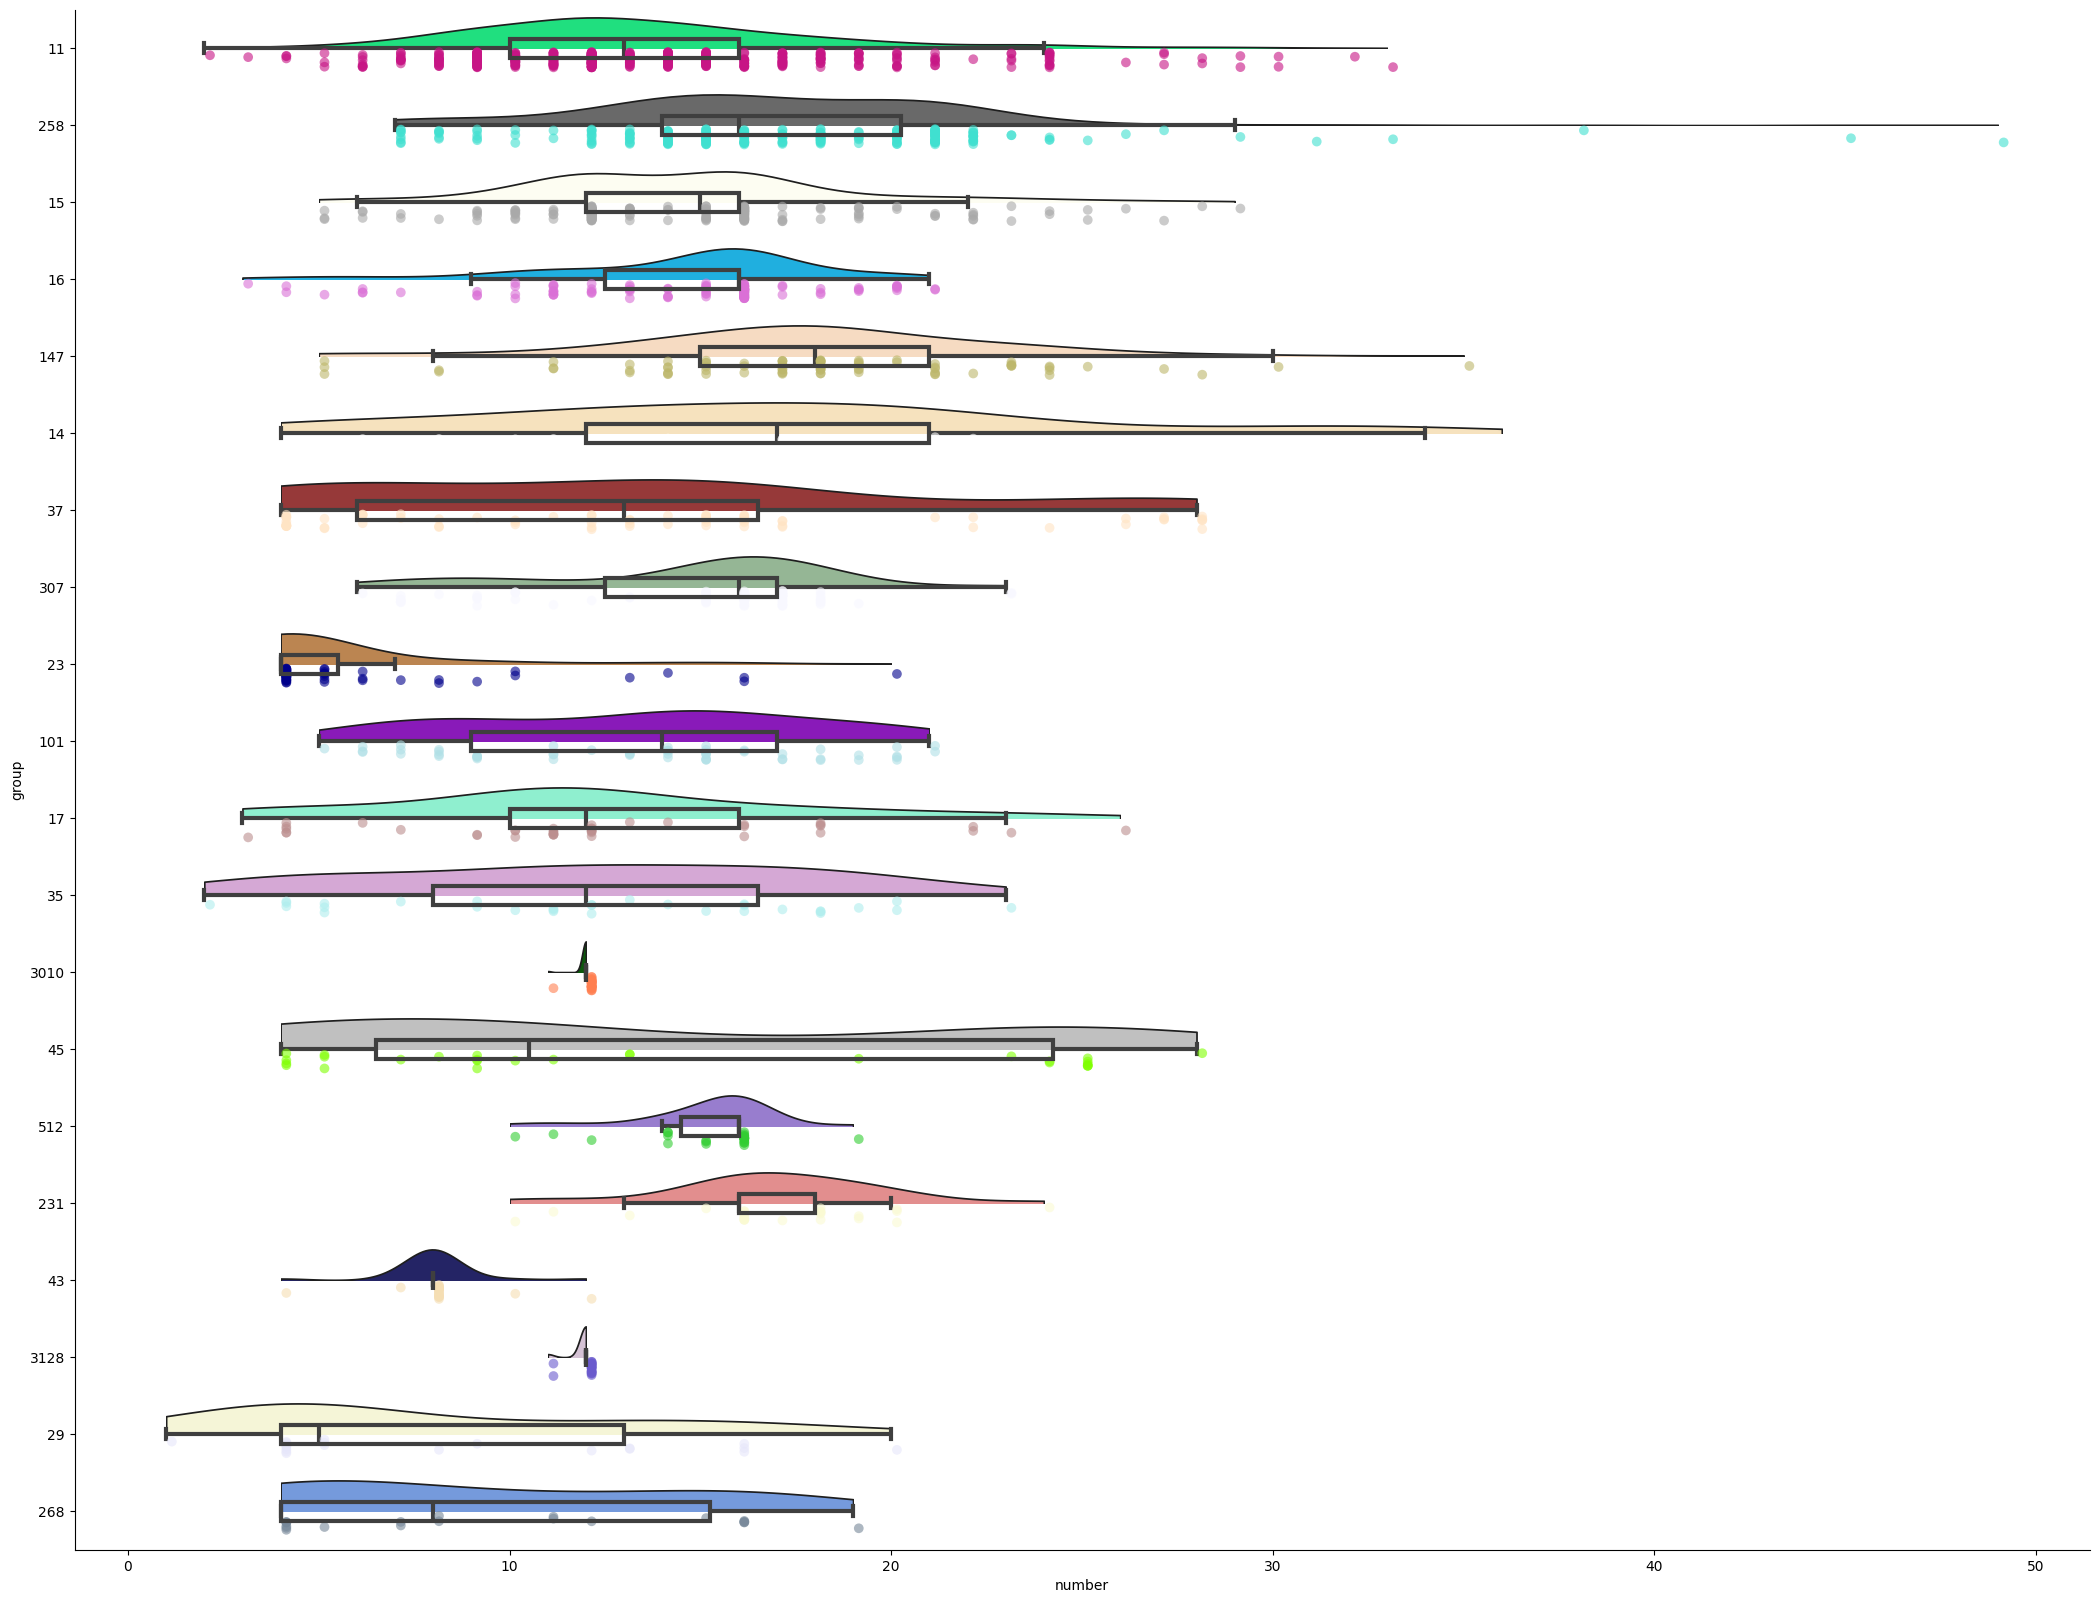

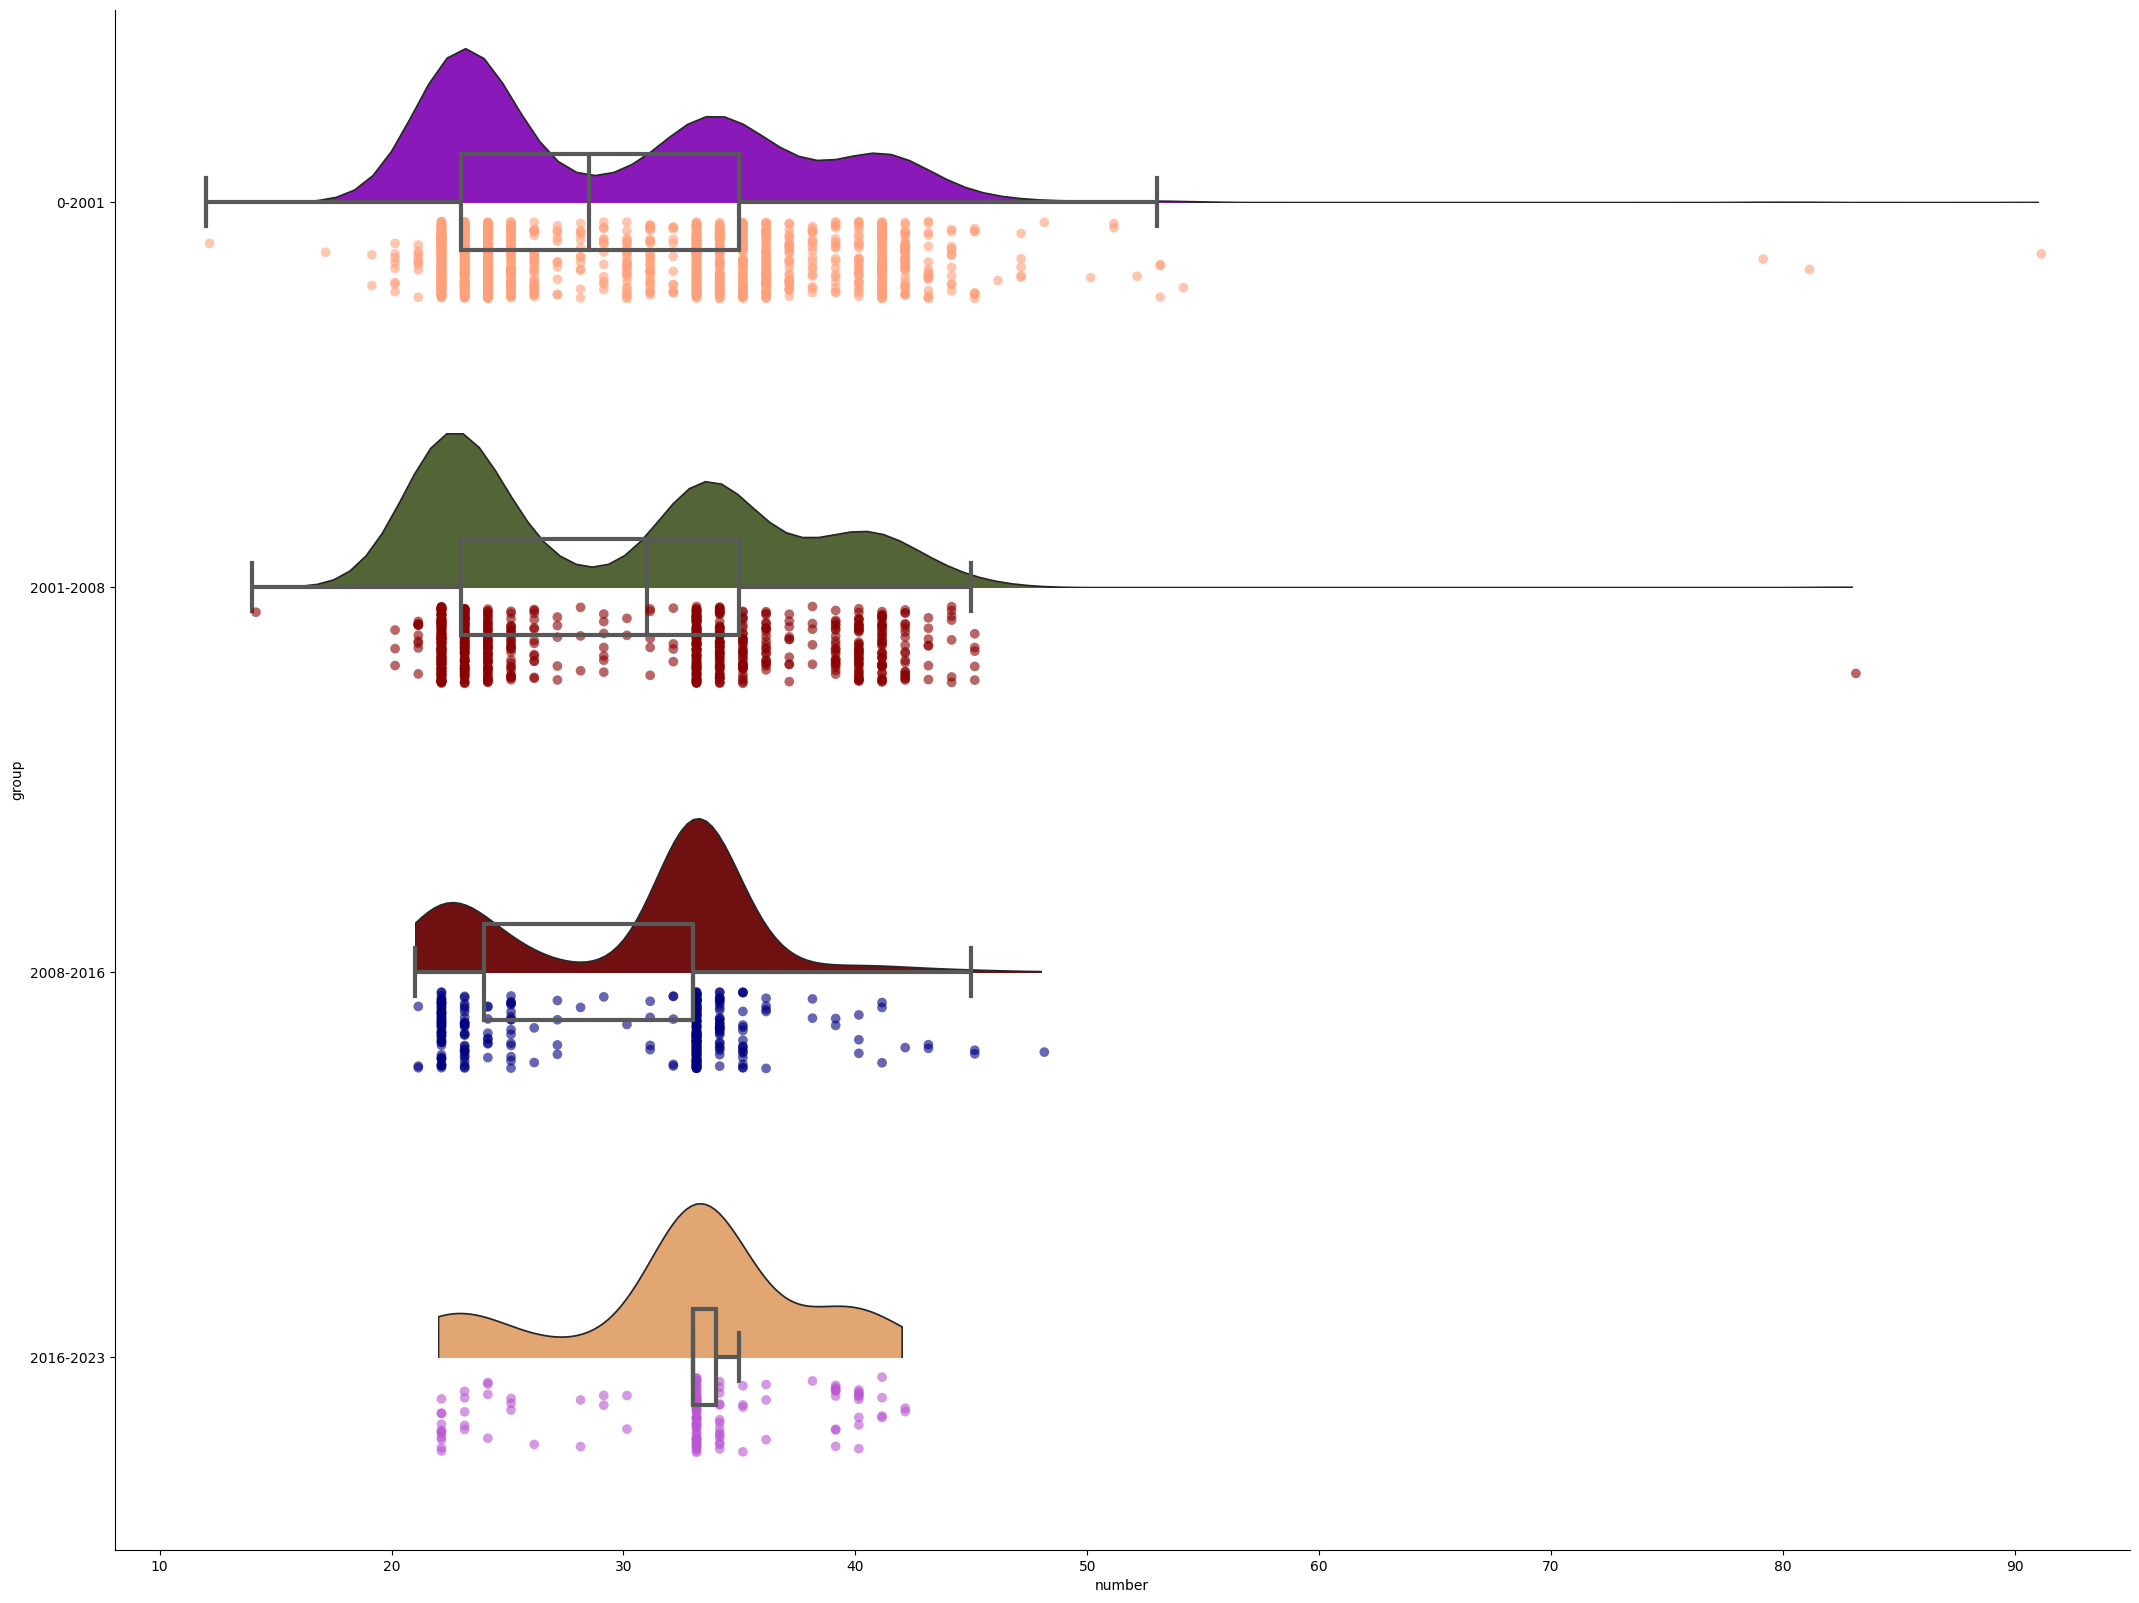

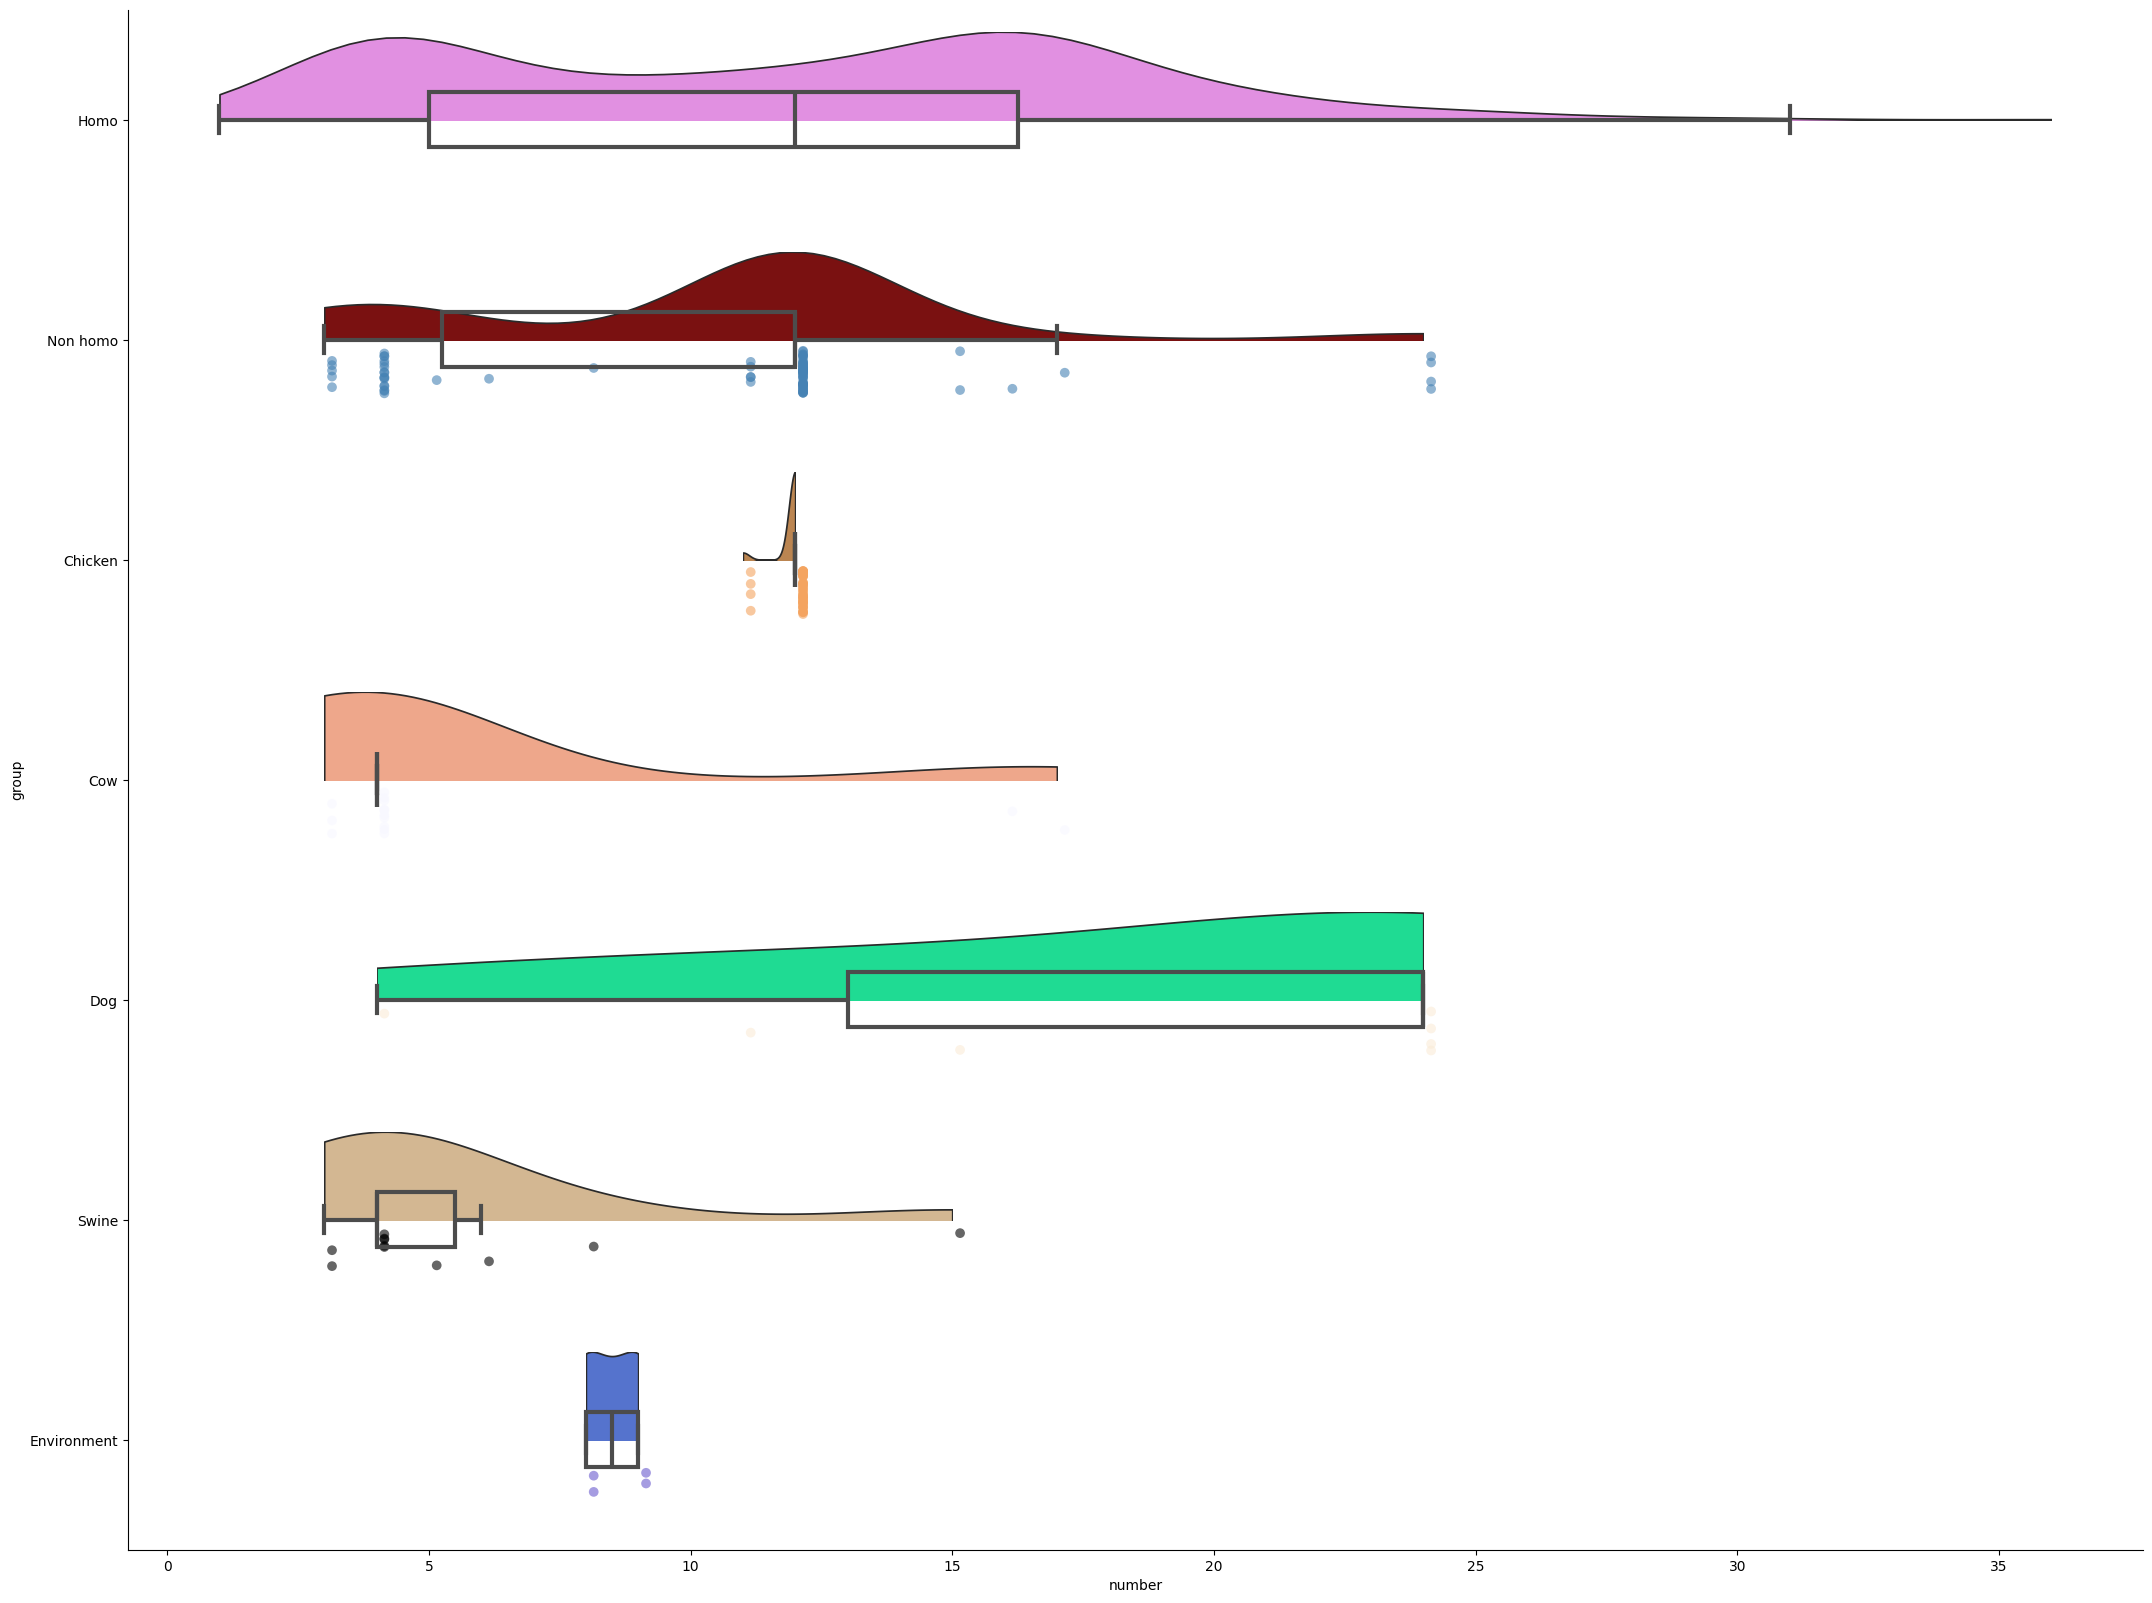

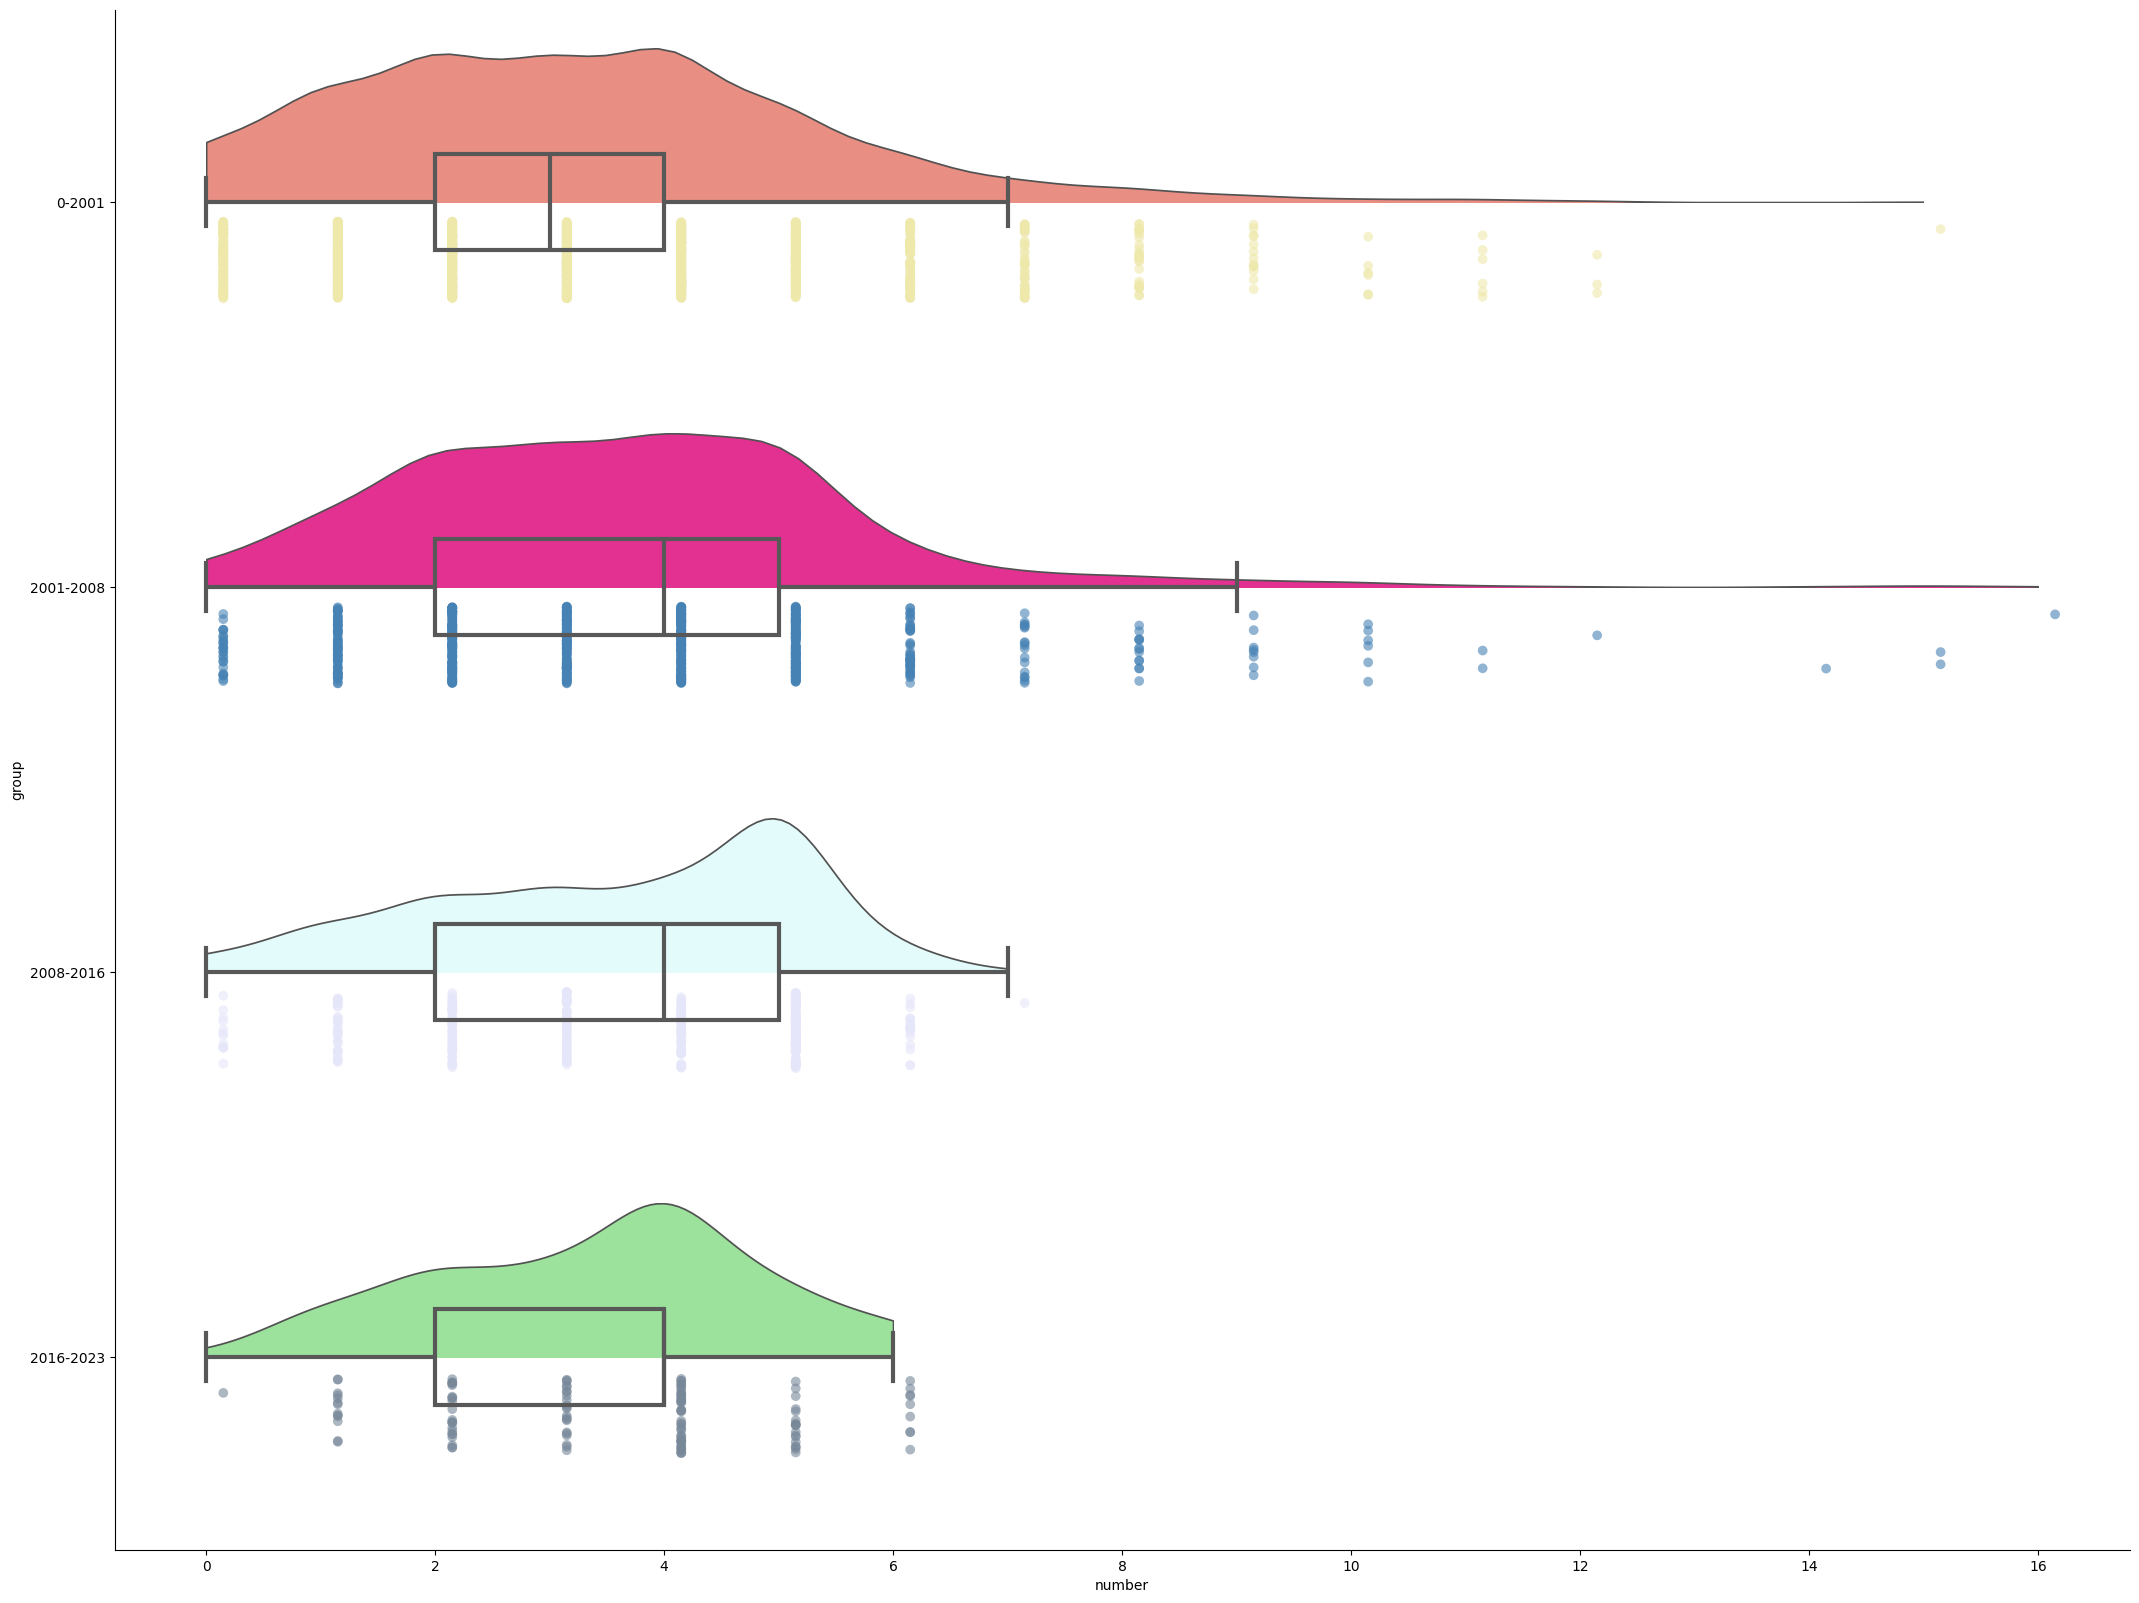

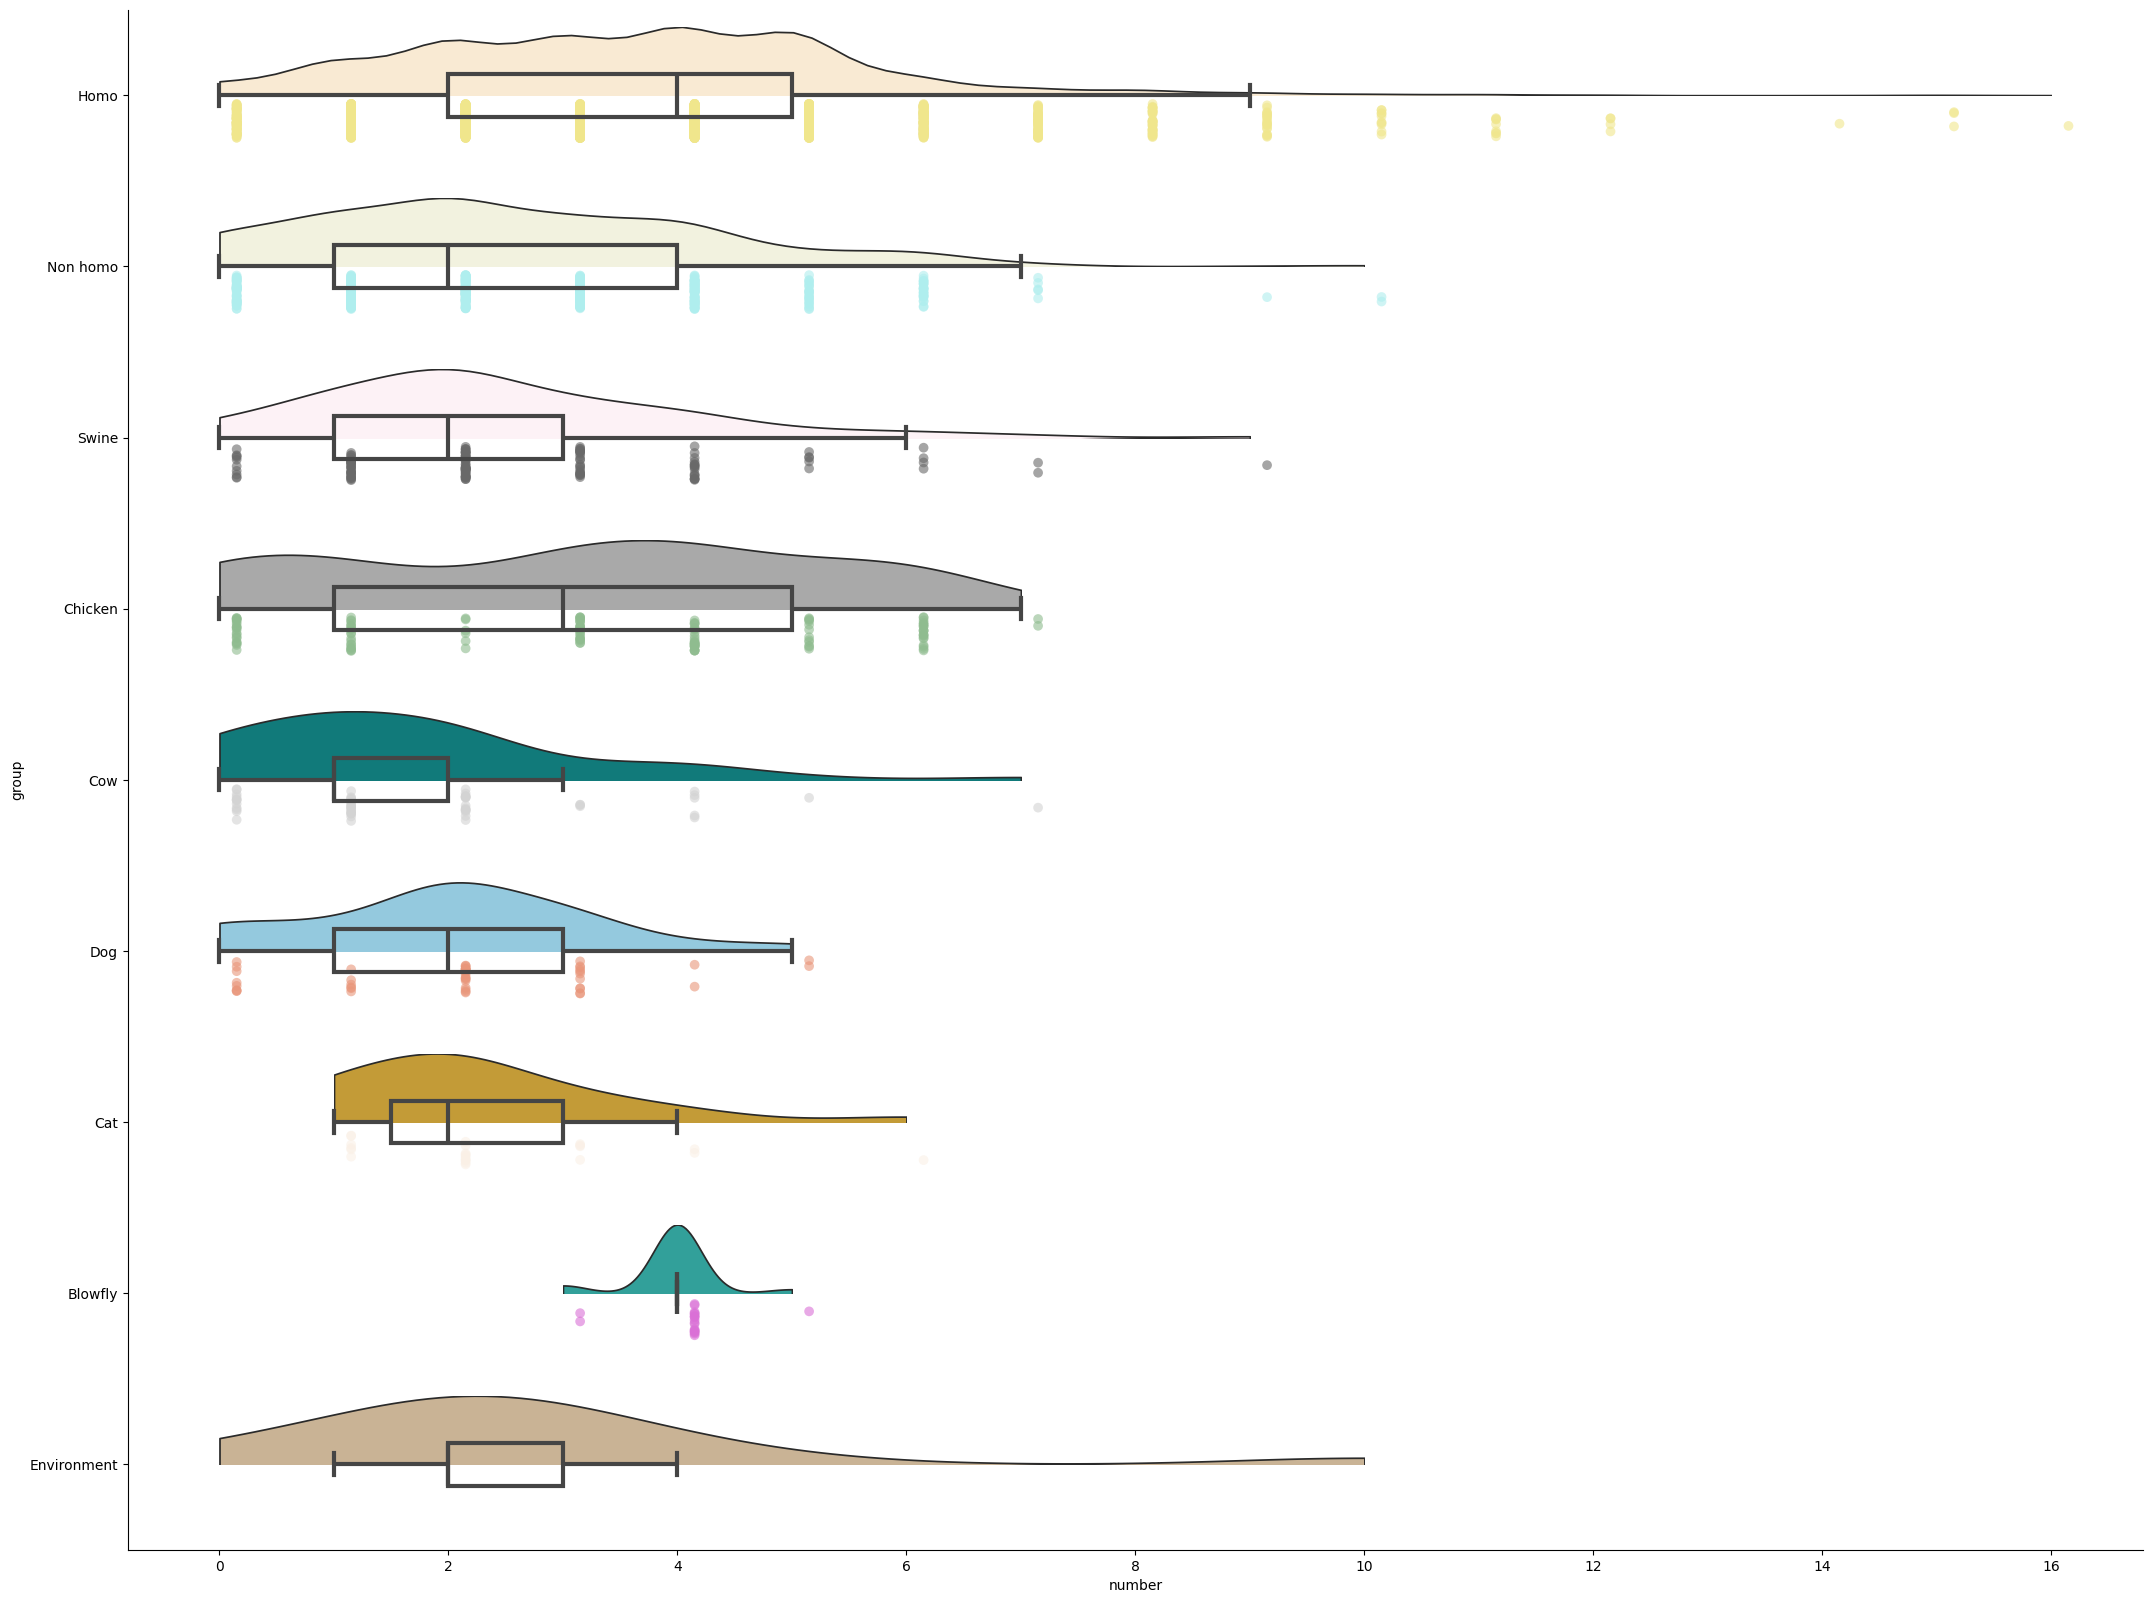

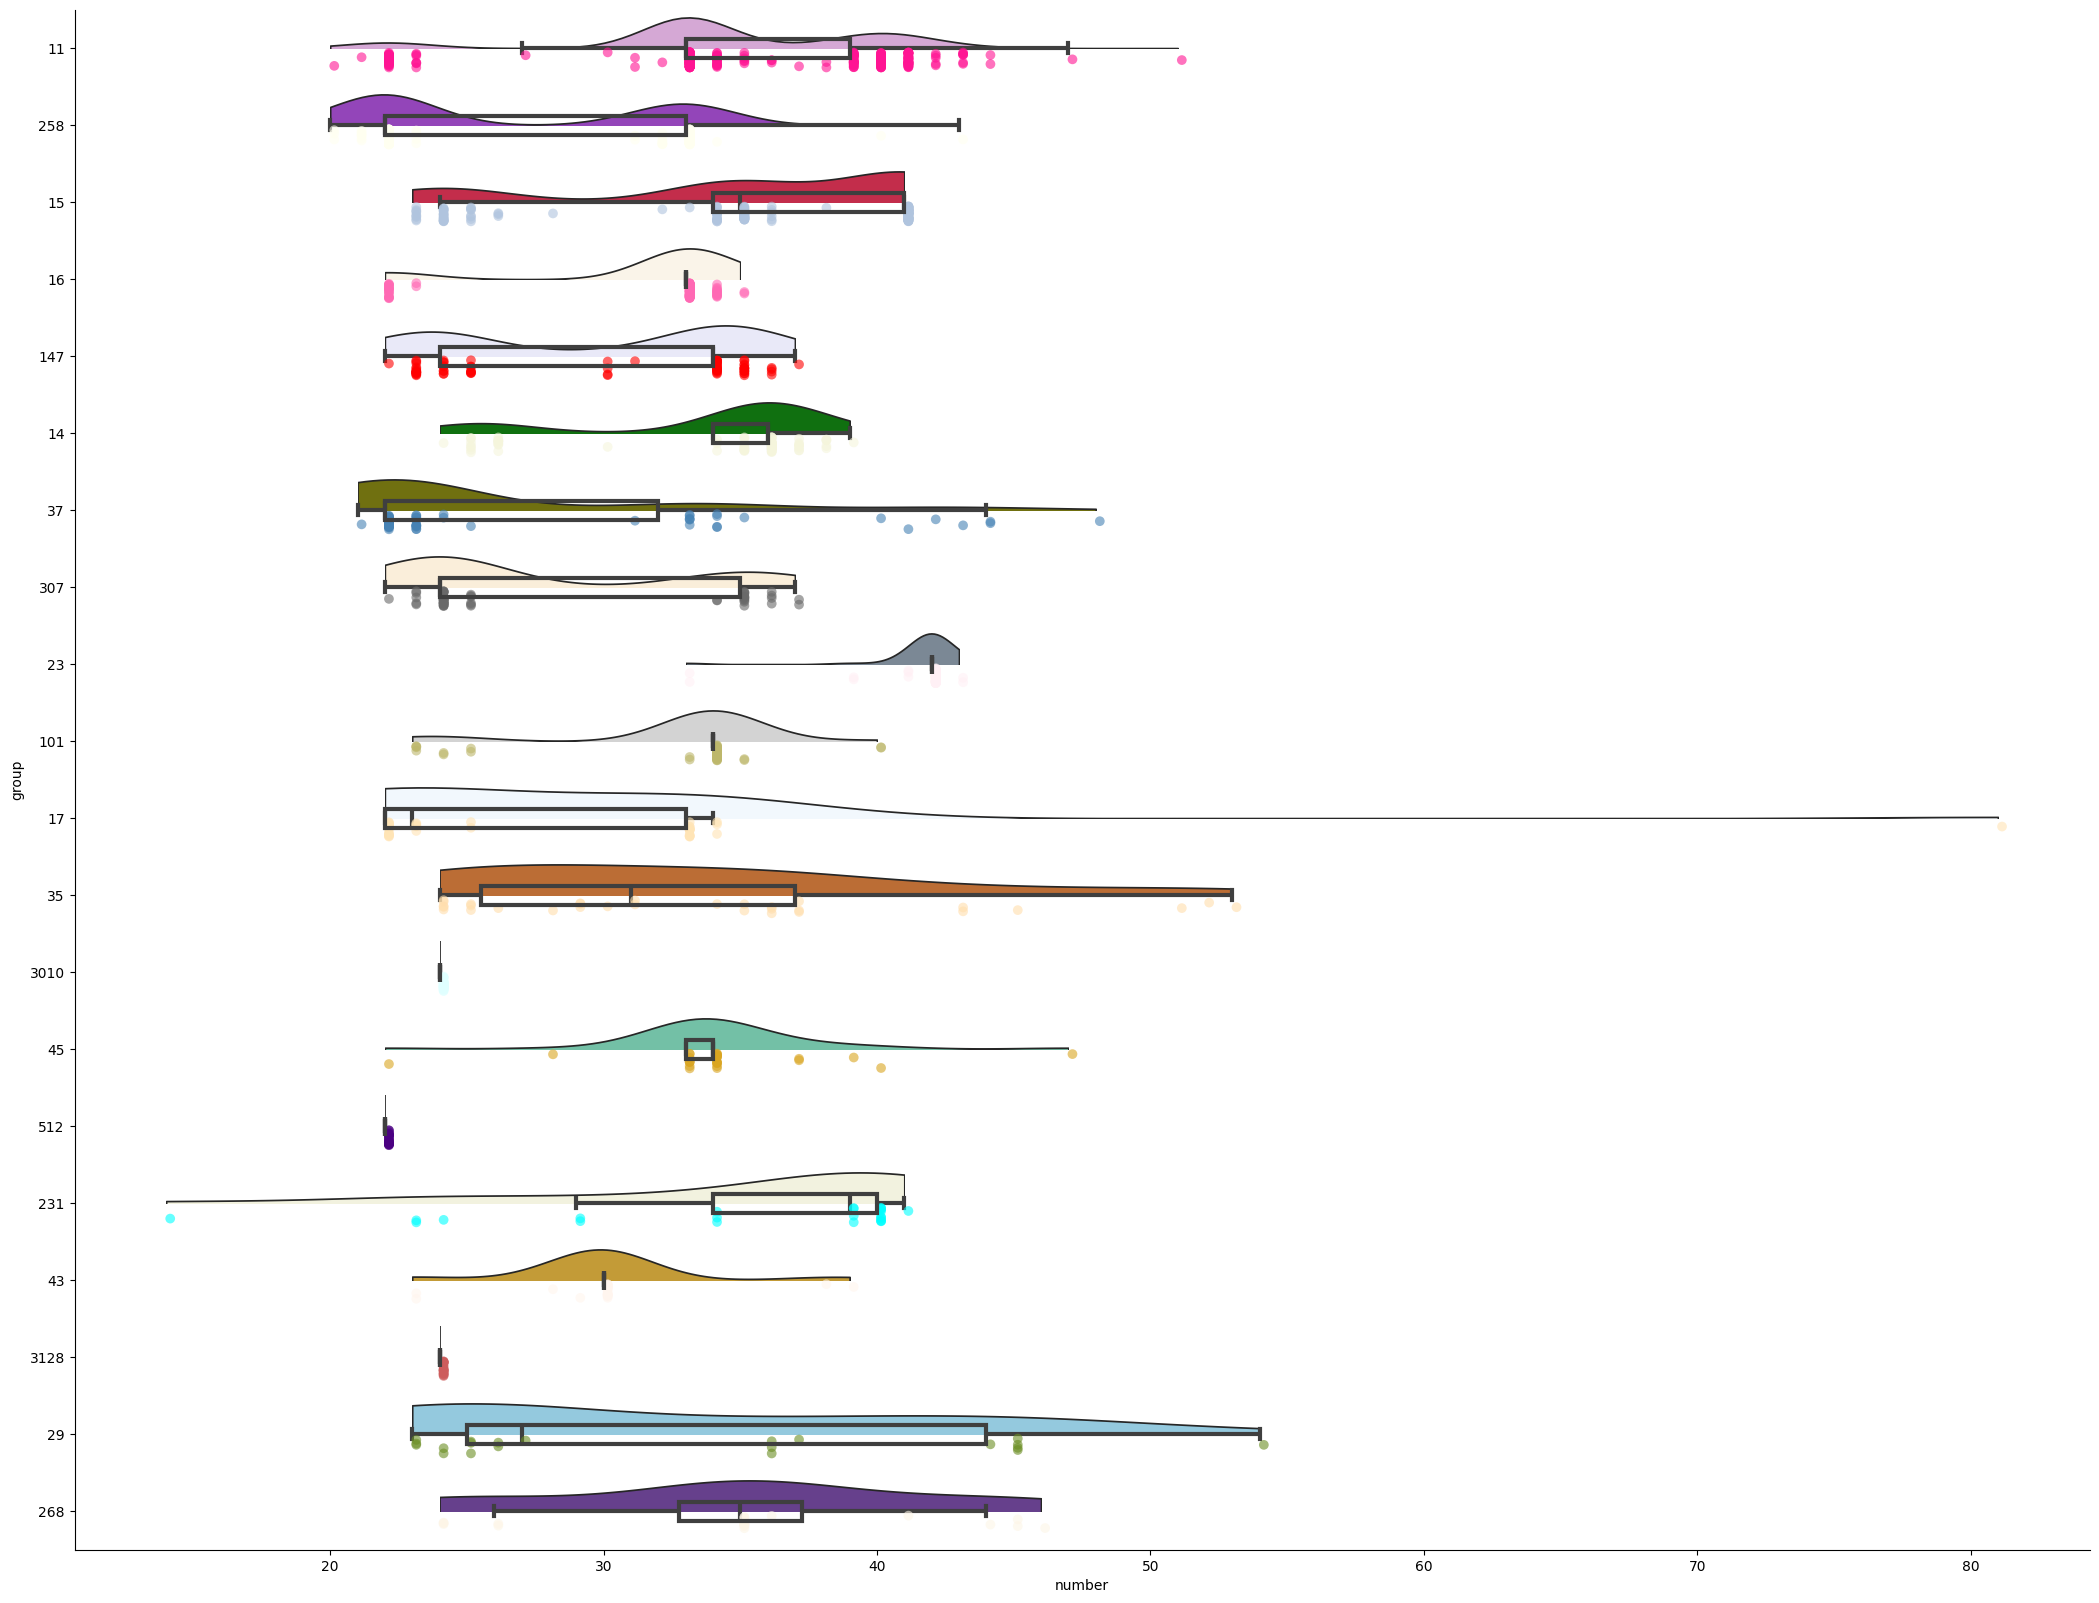

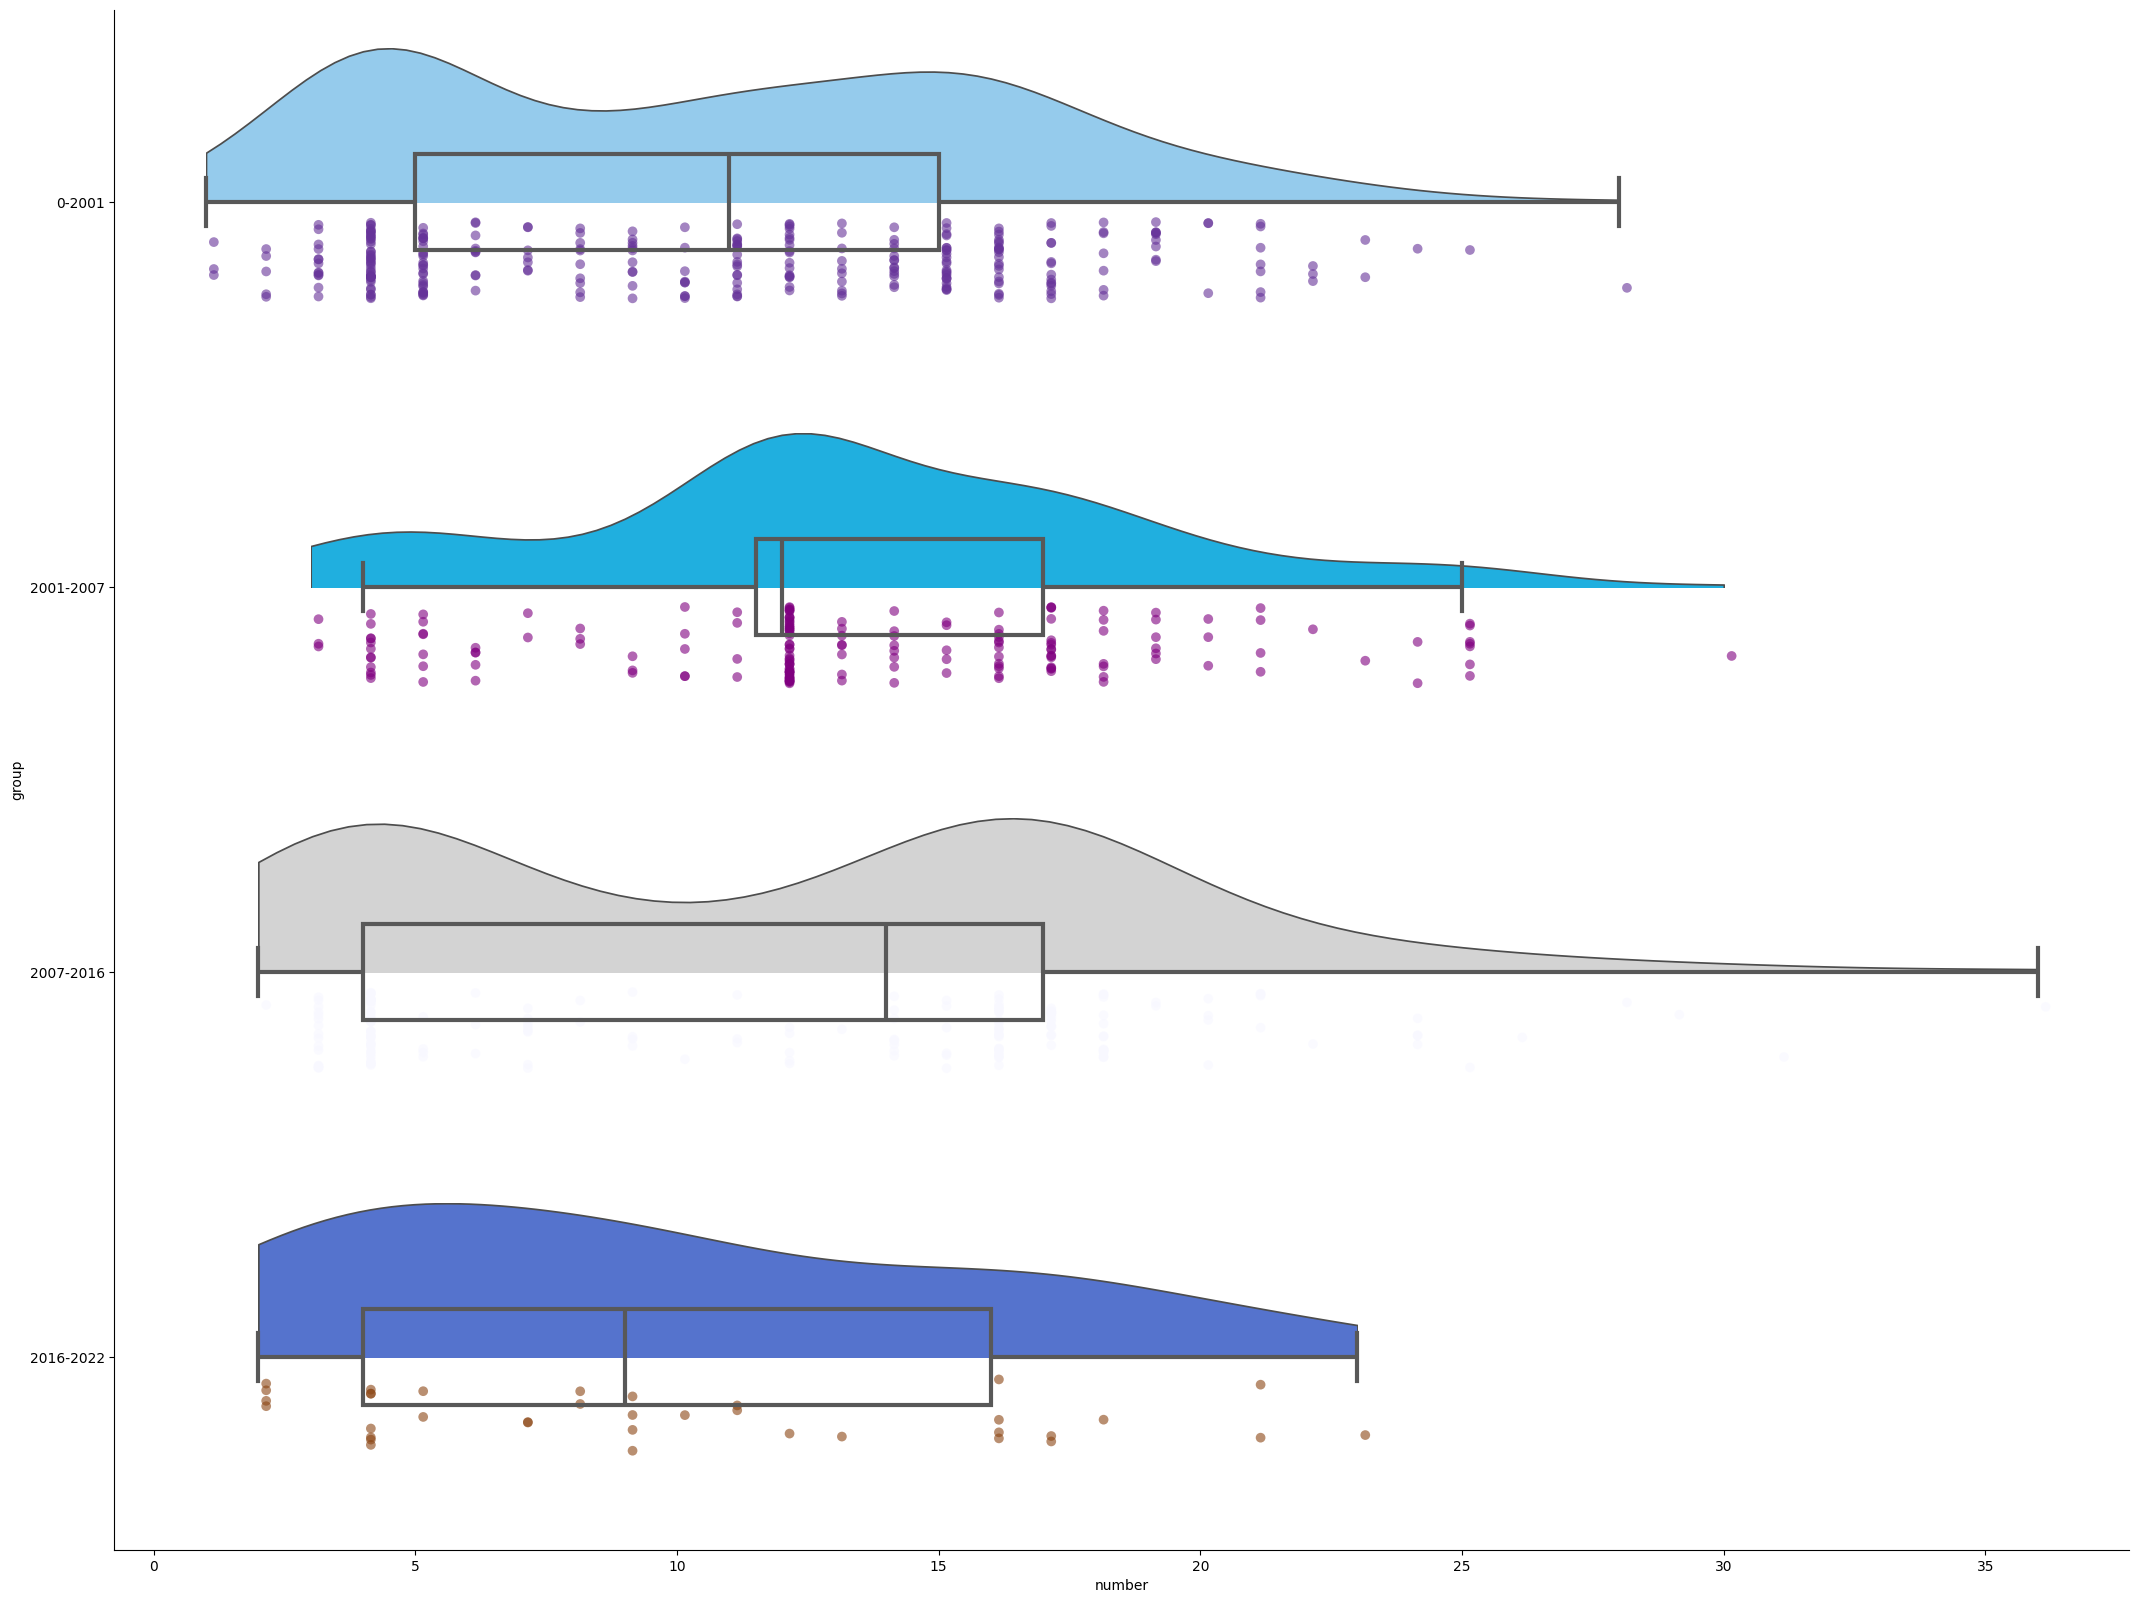

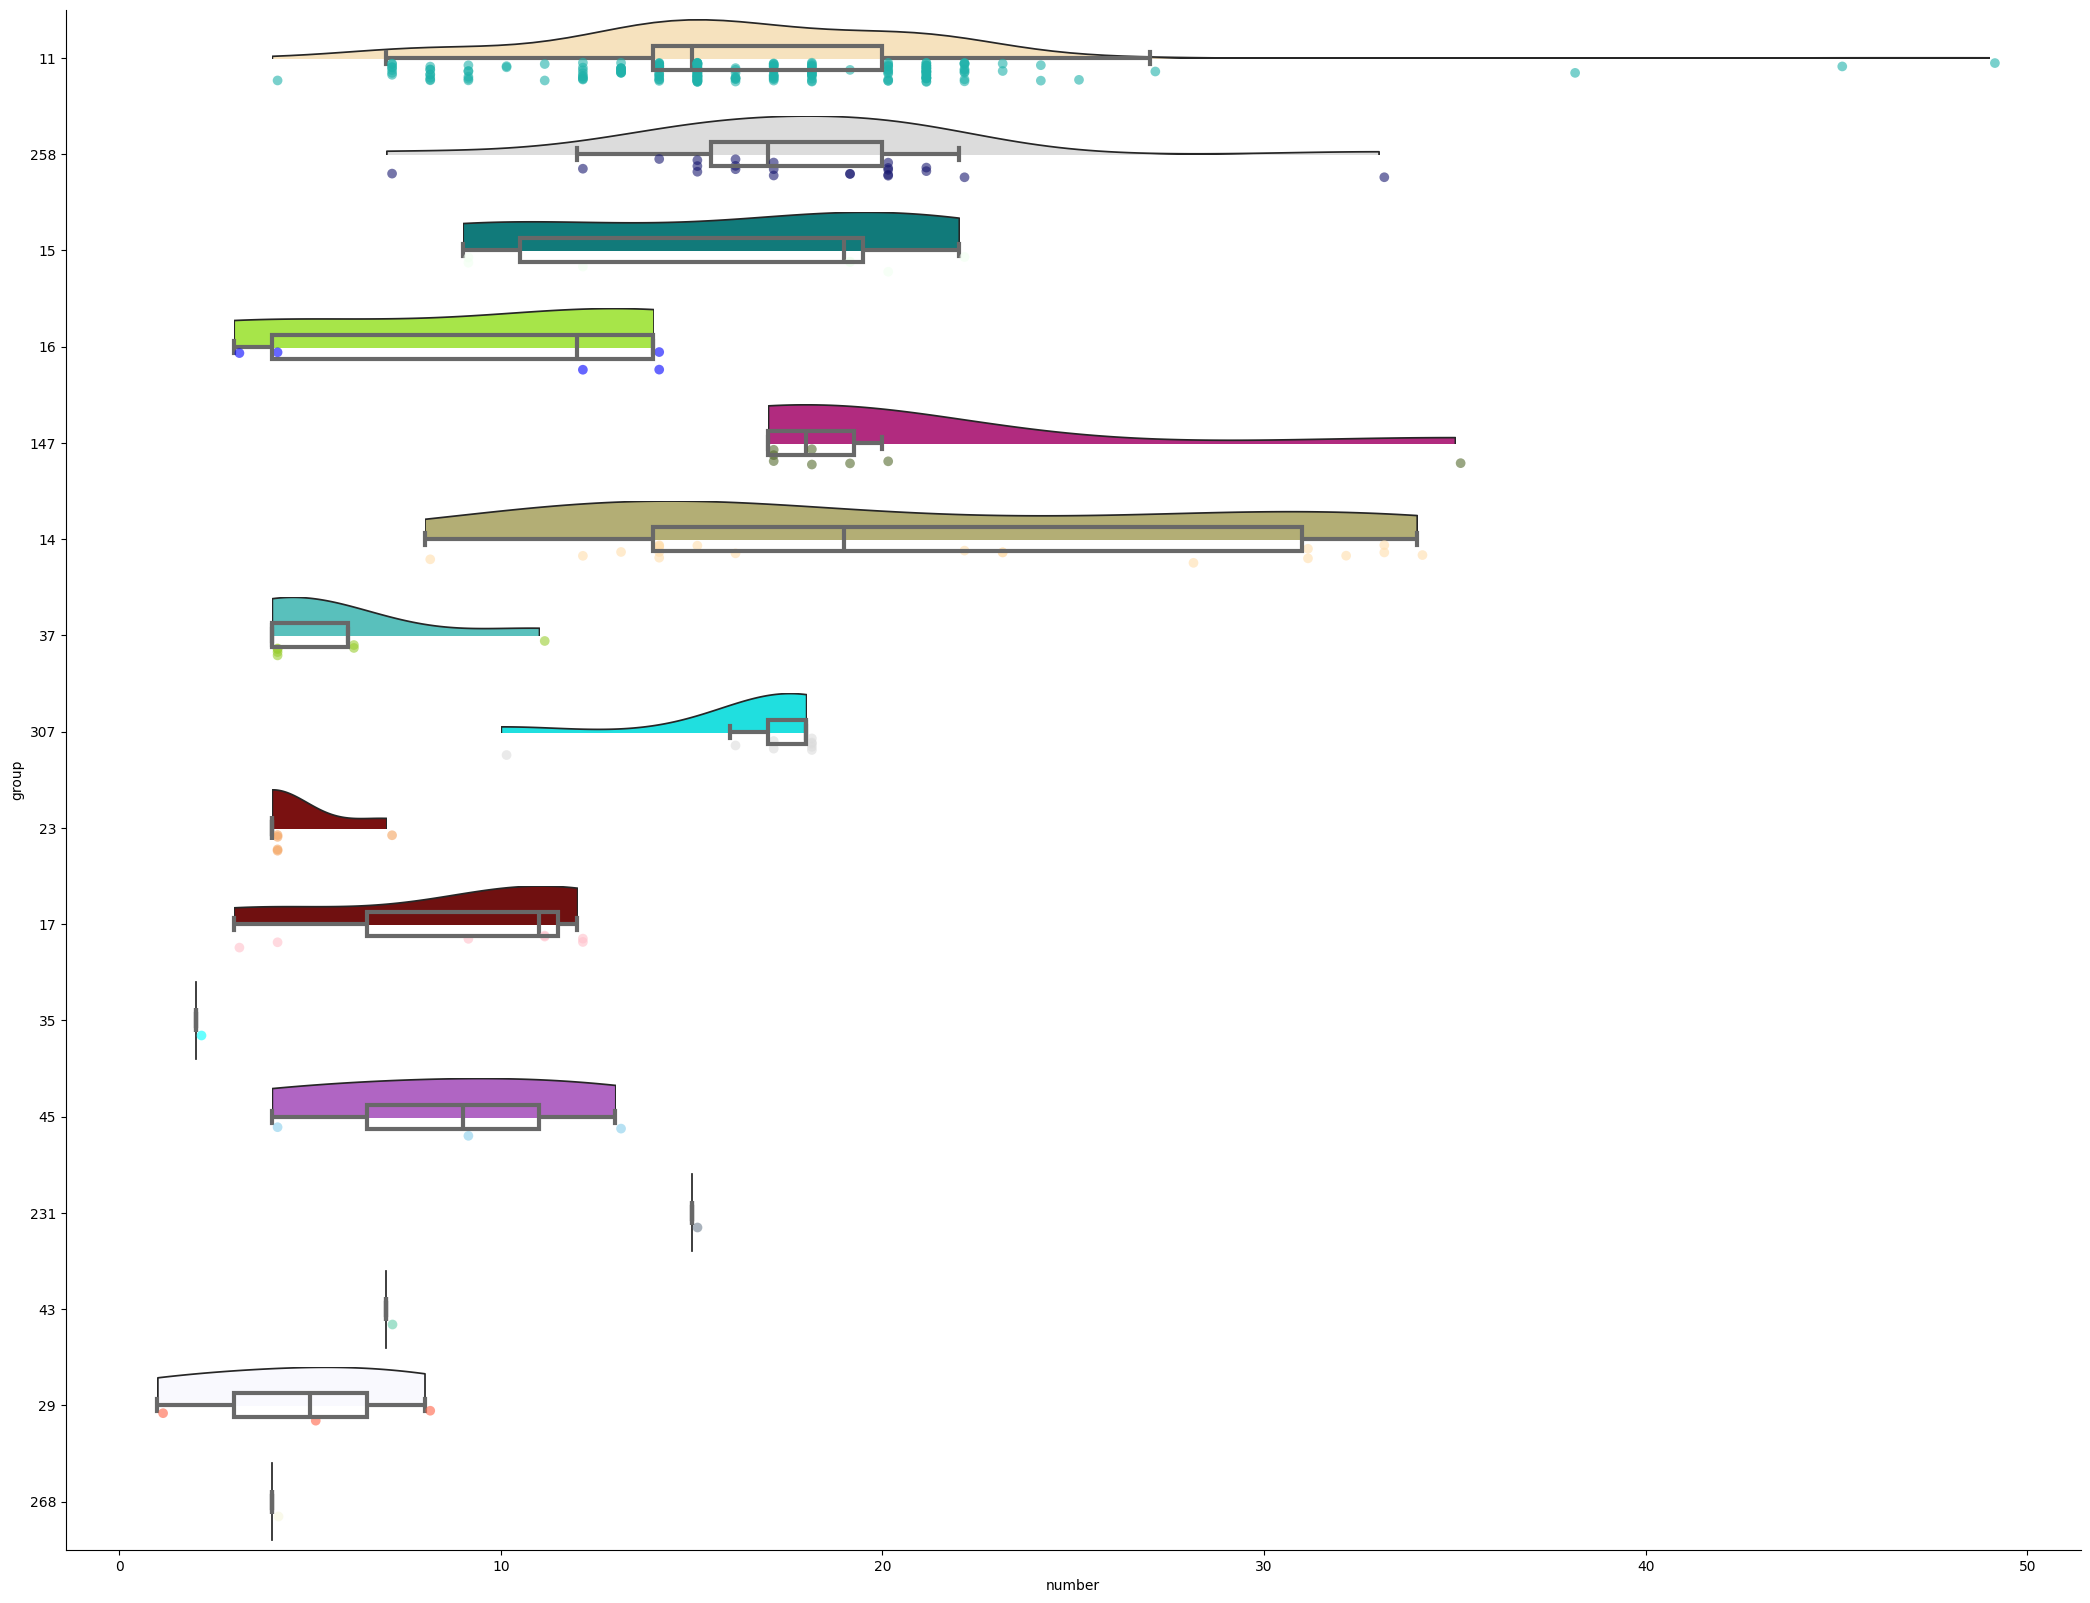

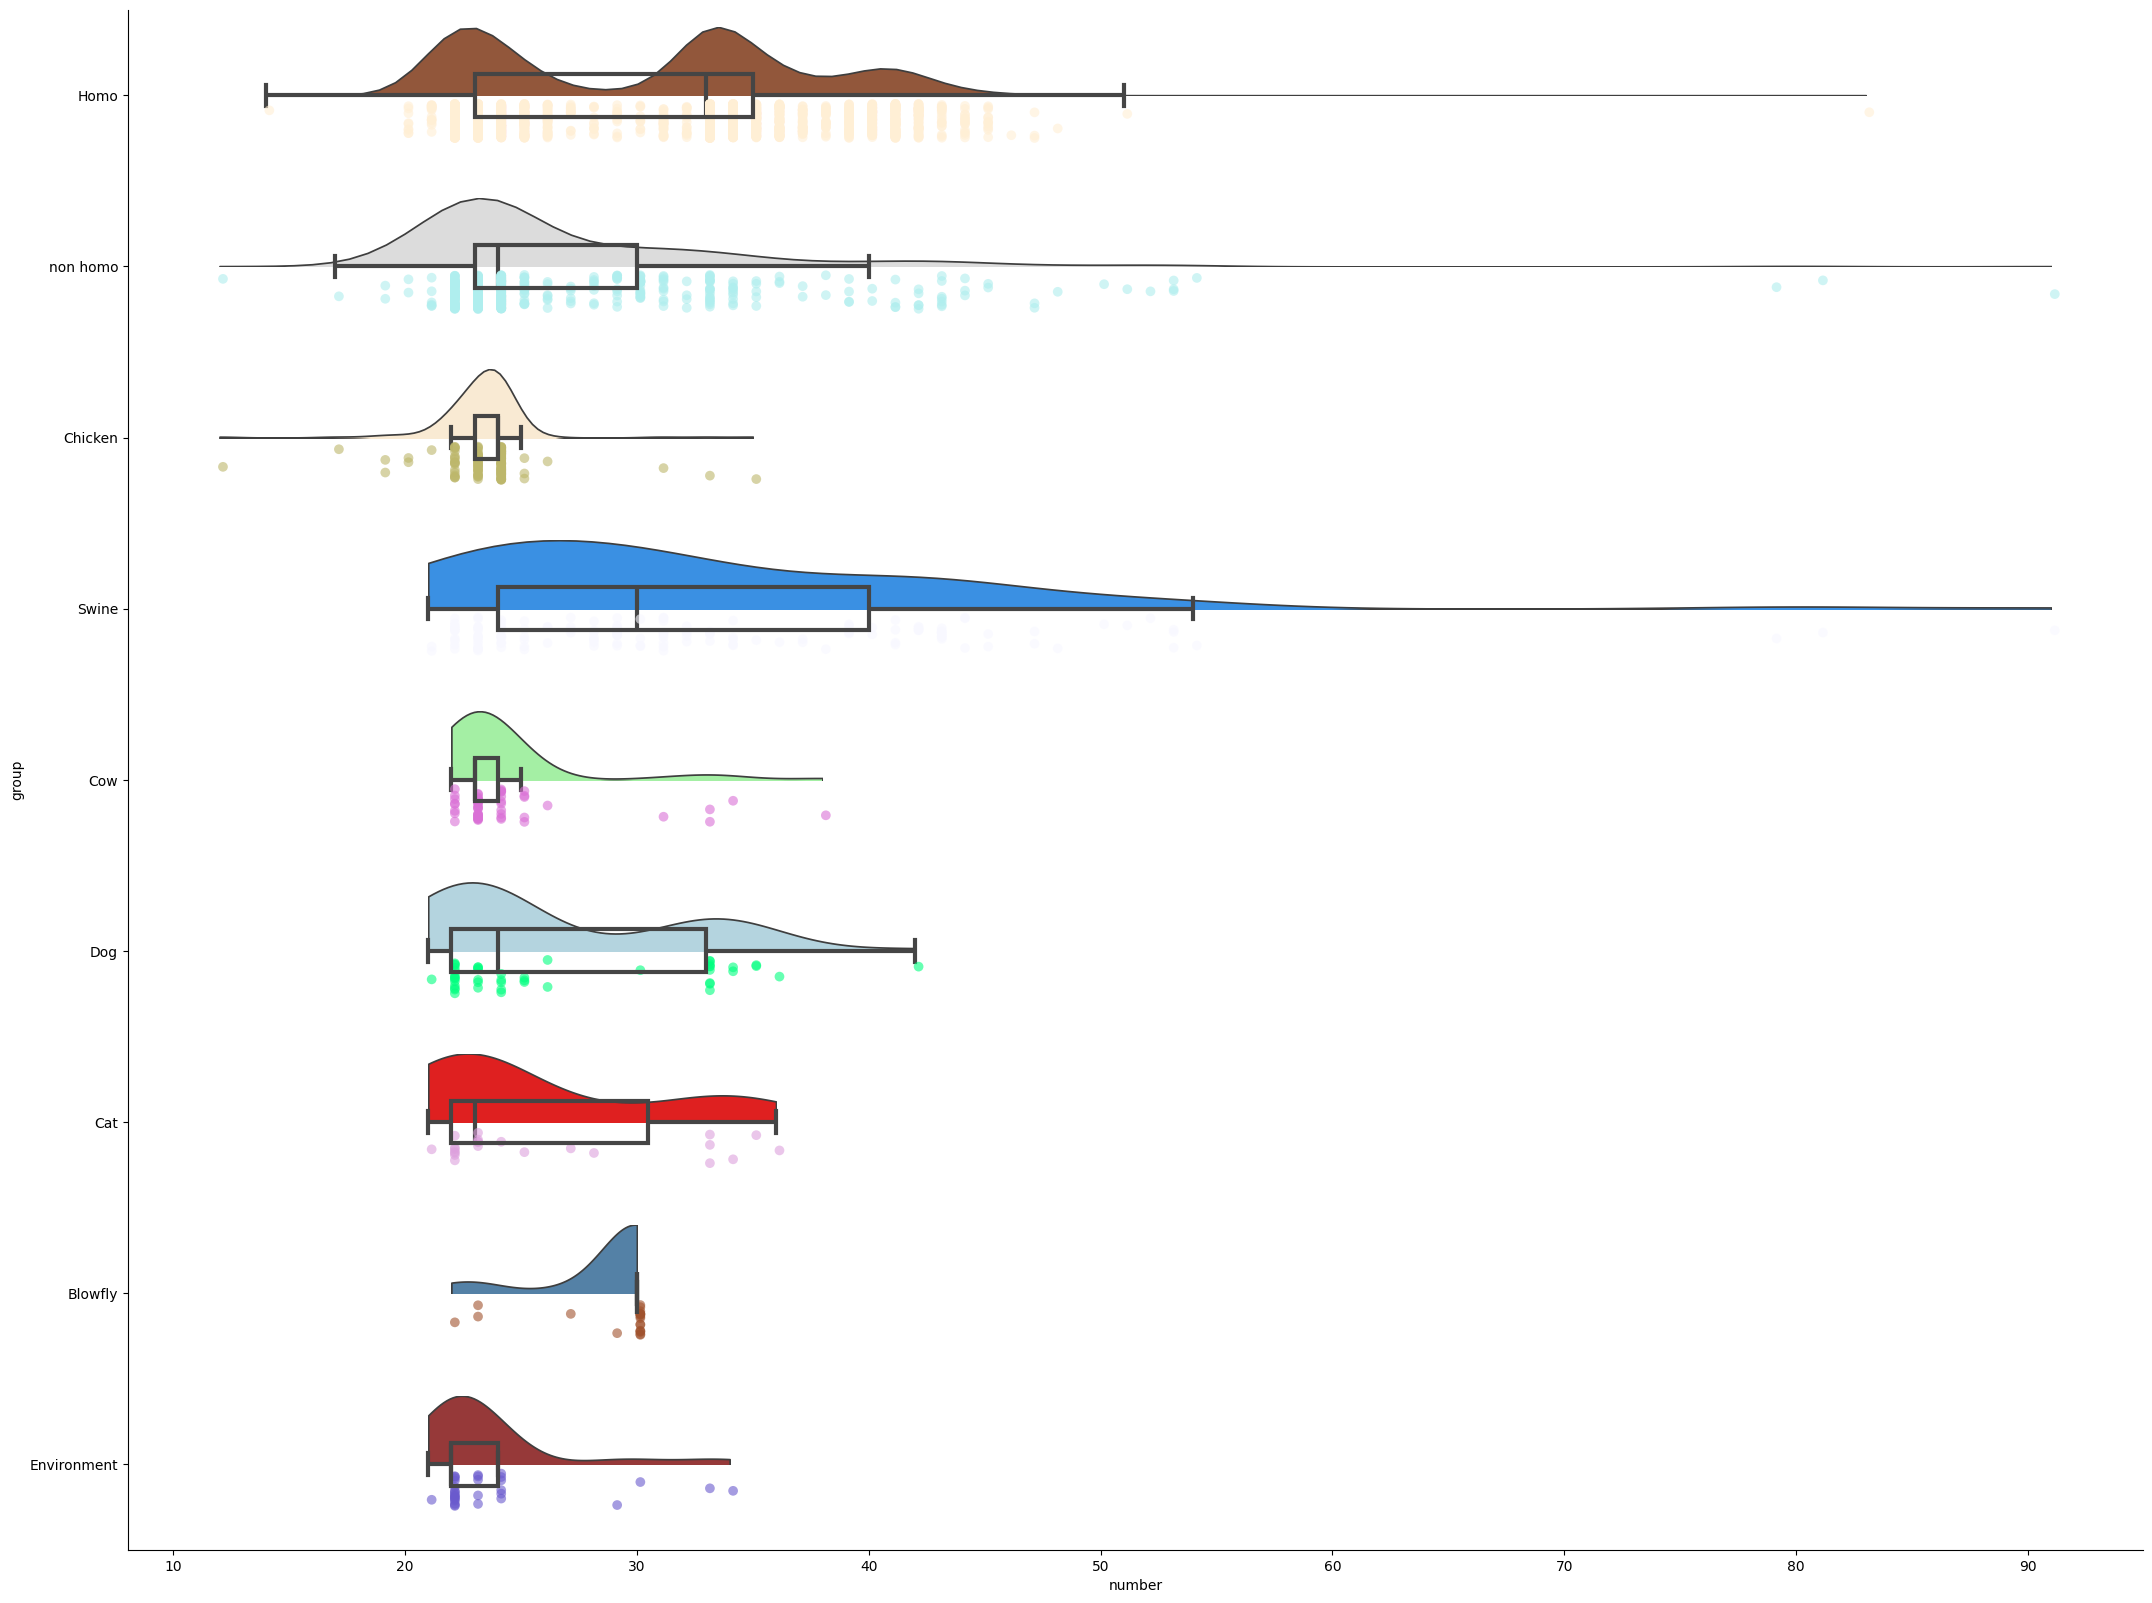

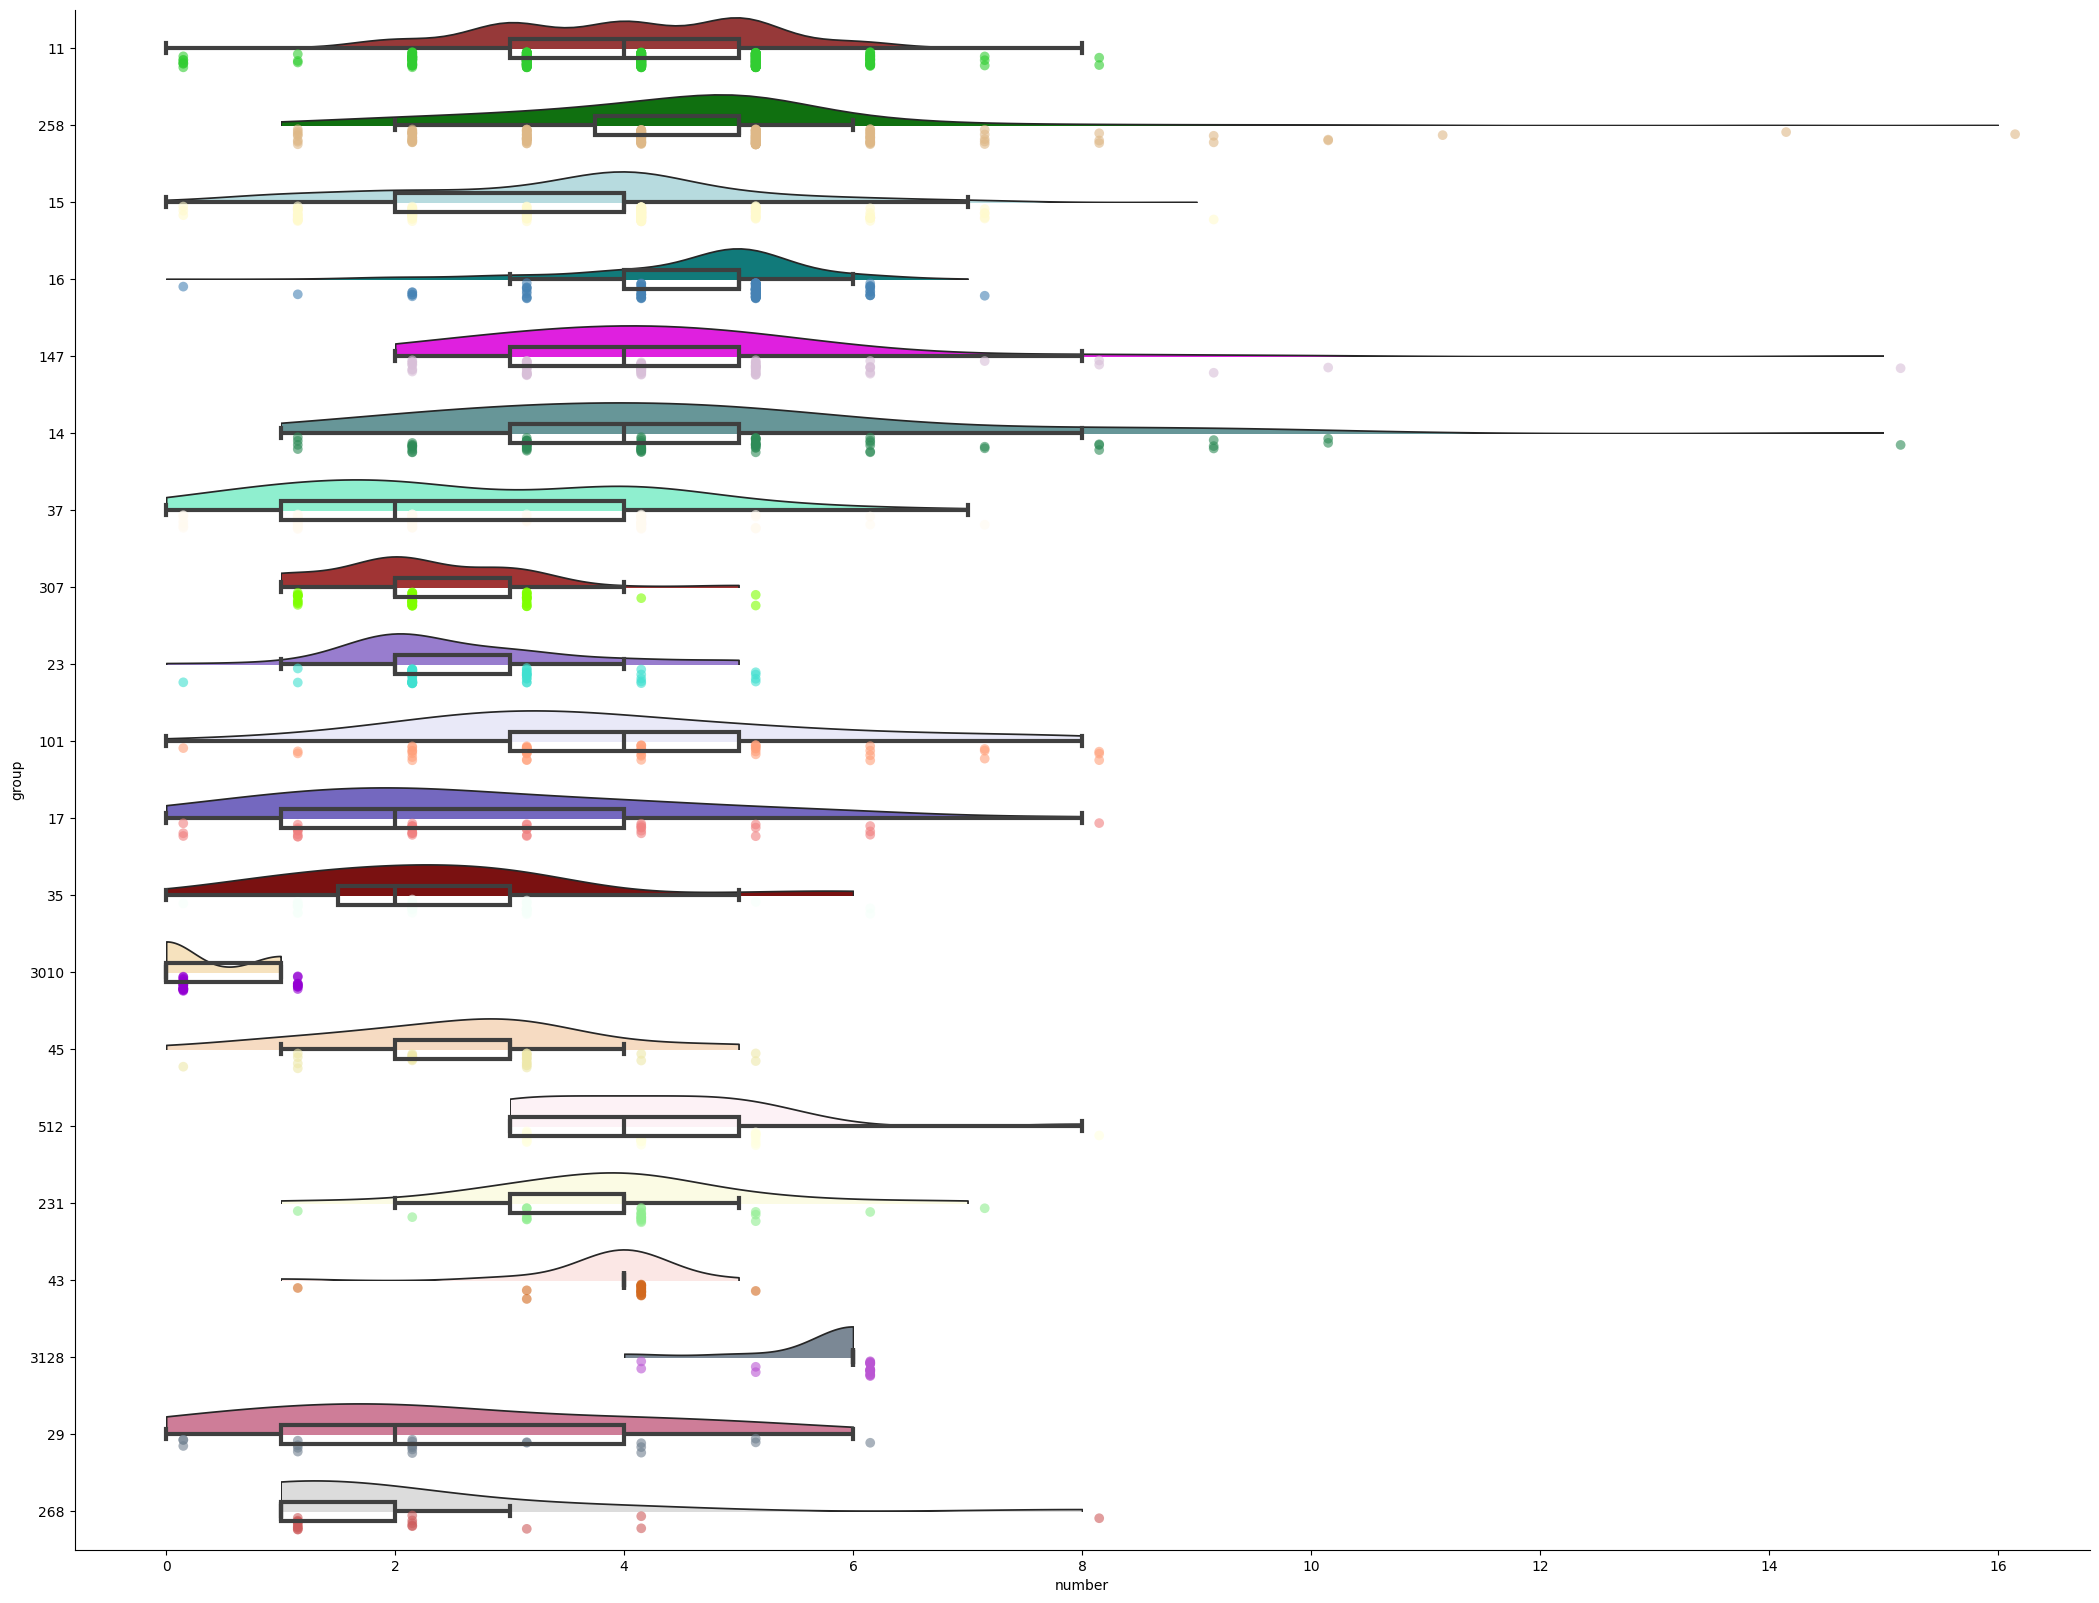

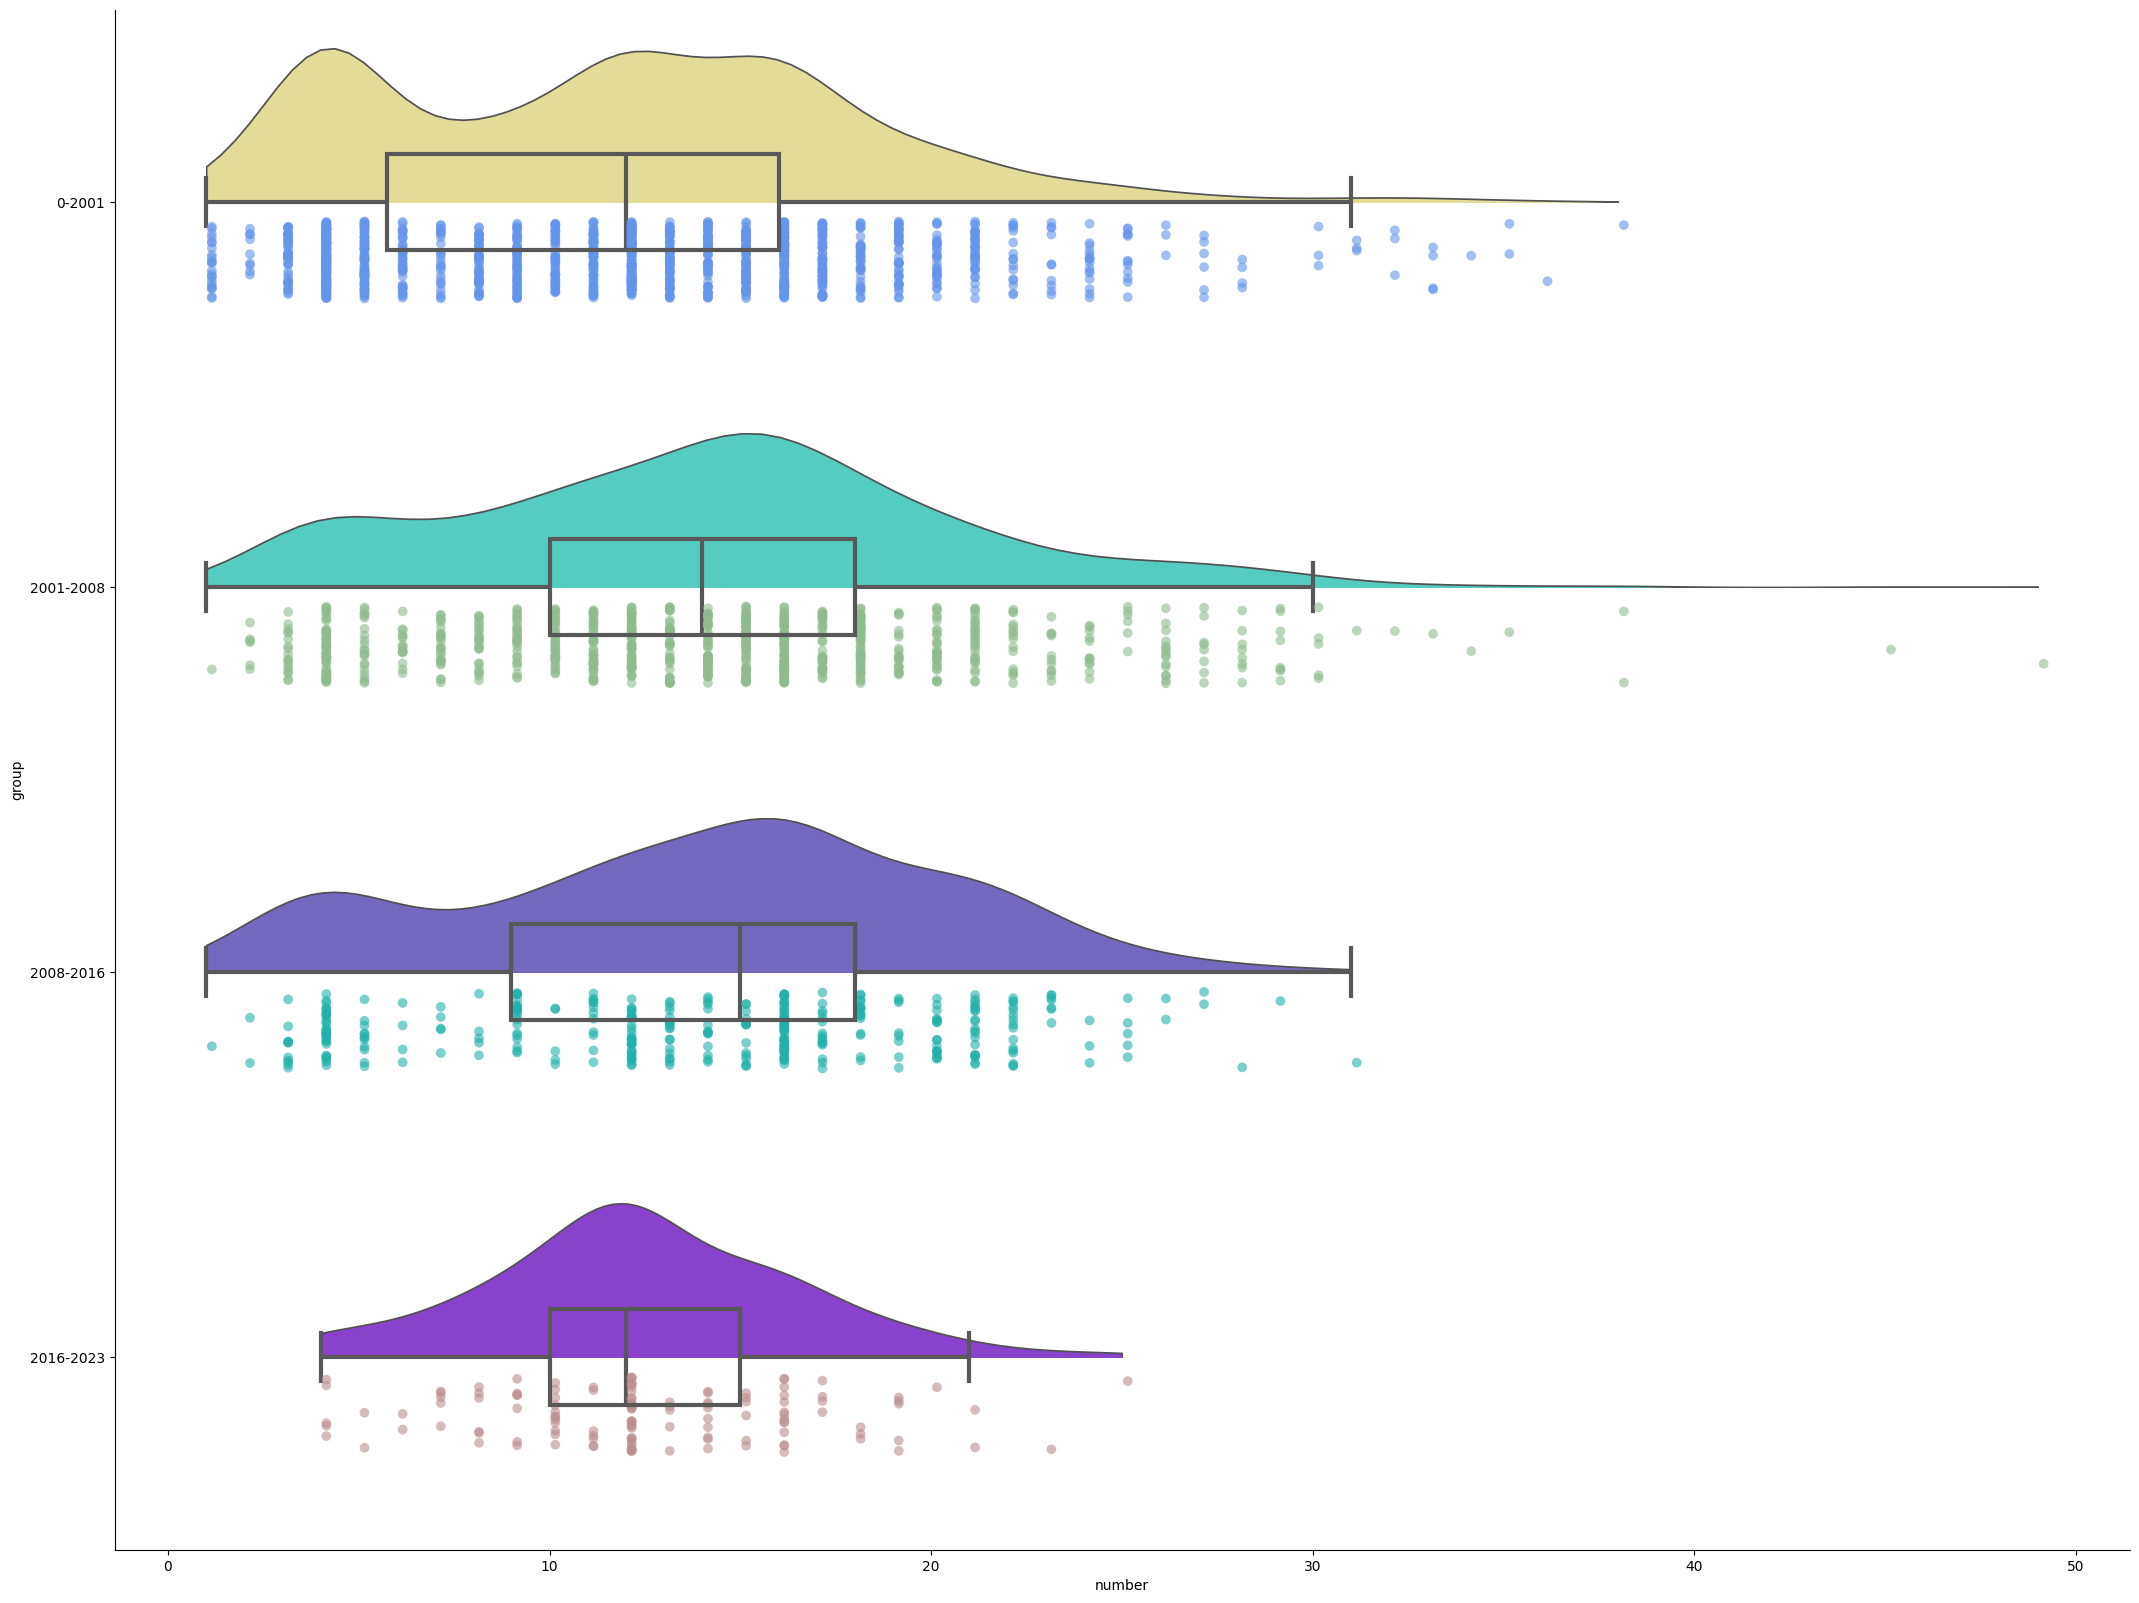

In [55]:

file_list = os.listdir(base_path)

for idx, file in enumerate(file_list):

    print(f'processing {idx}/{len(file_list)}: {file}')
    file_path = f'{base_path}/{file}'

    plot_df, name_list = read_df_file(file_path)
    prefix = '.'.join(os.path.basename(file_path).split('.')[:-1])
    save_file = f'{fig_save_path}/{prefix}.eps'
    
    plt.figure(figsize=(26, 20))
    
    colors_1 = generate_random_color(name_list)
    colors_2 = generate_random_color(name_list)
    
    ax = sns.violinplot(x='number', y='group', hue='group', data=plot_df,
                        palette=colors_1,
                        cut=0, inner=None, legend=False)
    
    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                           transform=ax.transData))
    
    
    num_items = len(ax.collections)
    sns.stripplot(x='number', y='group', hue='group', data=plot_df,
                  palette=colors_2,
                  alpha=0.6, size=7, legend=False)
    
    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + 0.15)
    
    sns.boxplot(x='number', y='group', data=plot_df, width=0.25,
                showfliers=False, 
                #showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='darkorange',
                               markersize=10, zorder=3),
                boxprops=dict(facecolor=(0,0,0,0), 
                              linewidth=3, zorder=3),
                whiskerprops=dict(linewidth=3),
                capprops=dict(linewidth=3),
                medianprops=dict(linewidth=3))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show the remaining spines (bottom and left).
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
    
    plt.savefig(save_file, format='svg', dpi=630, bbox_inches='tight')
    print(f'{save_file} saved.')